In [17]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_pickle('songs_train_preprocessed.pkl')
df_test = pd.read_pickle('songs_test_preprocessed.pkl')
print('train shape:', df_train.shape)
print('test shape:', df_test.shape)

train shape: (7303, 8)
test shape: (808, 8)


In [5]:
df_train.head()

title             artist  year   views  \
0               Untitled  Rex Orange County  2017  292064   
1             Dandelions            Ruth B.  2017  587288   
2                 I Like            G Herbo  2017  204698   
3                Kiss Me         Ed Sheeran  2011  434377   
4  I Say A Little Prayer    Aretha Franklin  1968  401893   

                                                 url  \
0  https://genius.com/Rex-Orange-County-Untitled-...   
1        https://genius.com/Ruth-B-Dandelions-lyrics   
2           https://genius.com/G-Herbo-I-Like-lyrics   
3       https://genius.com/Ed-Sheeran-Kiss-Me-lyrics   
4  https://genius.com/Aretha-Franklin-I-Say-A-Lit...   

                                               lyric  \
0  So if for any reason there's some miscommunica...   
1  Maybe it's the way you say my name\nMaybe it's...   
2  Pull up in a new G-Wag'\nSky blue body paint, ...   
3  Yeah, I've been feelin' everything\nFrom hate ...   
4  (I say a little prayer for you)\nThe moment I ...   

                                    lyric_proccessed  \
0  so if for any reason there is some miscommunic...   
1  maybe it is the way you say my name\nmaybe it ...   
2  pull up in a new gwag\nsky blue body paint soo...   
3  yeah i have been feelin everything\nfrom hate ...   
4  i say a little prayer for you\nthe moment i wa...   

                                              tokens  
0  [reason, miscommunication, lying, face, immatu...  
1  [maybe, way, say, name, maybe, way, play, game...  
2  [pull, new, gwag, sky, blue, body, paint, soow...  
3  [yeah, feelin, everything, hate, love, love, l...  
4  [say, little, prayer, moment, wake, put, makeu...

In [6]:
df_test.head()

title                       artist  \
0  BTS - Your eyes tell English Translation  Genius English Translations   
1                                  Superman                       Eminem   
2                          Pussy Money Weed                    Lil Wayne   
3                            Therefore I Am                Billie Eilish   
4                                  Renegade              Big Red Machine   

   year    views                                                url  \
0  2020   574010  https://genius.com/Genius-English-Translations...   
1  2002  4716120          https://genius.com/Eminem-Superman-lyrics   
2  2007   392937  https://genius.com/Lil-Wayne-Pussy-Money-Weed-...   
3  2020  1712636  https://genius.com/Billie-Eilish-Therefore-I-A...   
4  2021   404770  https://genius.com/Big-Red-Machine-Renegade-ly...   

                                               lyric  \
0  [Verse 1: Jung Kook,\nV\n]\nWhy are my eyes fi...   
1  Dina Rae\nThey call me Superman\nLeap tall hoe...   
2  Oh, yes, I love her, like Egyptian\nShe's "Poi...   
3  I'm not your friend\nOr anything, damn\nYou th...   
4  I tapped on your window on your darkest night\...   

                                    lyric_proccessed  \
0  verse  jung kook\nv\n\nwhy are my eyes filled ...   
1  dina rae\nthey call me superman\nleap tall hoe...   
2  oh yes i love her like egyptian\nshe is poison...   
3  i am not your friend\nor anything damn\nyou th...   
4  i tapped on your window on your darkest night\...   

                                              tokens  
0  [verse, jung, kook, eye, filled, tear, hey, st...  
1  [dina, rae, call, superman, leap, tall, hoe, s...  
2  [yes, love, like, egyptian, poison, michael, b...  
3  [friend, anything, damn, think, man, think, th...  
4  [tapped, window, darkest, night, really, going...

Vector Representation

In [7]:
from sentence_transformers import SentenceTransformer

In [8]:
df = df_train.copy()
df = df[['title', 'tokens']]
df.head()

title                                             tokens
0               Untitled  [reason, miscommunication, lying, face, immatu...
1             Dandelions  [maybe, way, say, name, maybe, way, play, game...
2                 I Like  [pull, new, gwag, sky, blue, body, paint, soow...
3                Kiss Me  [yeah, feelin, everything, hate, love, love, l...
4  I Say A Little Prayer  [say, little, prayer, moment, wake, put, makeu...

In [56]:
df_test_1 = df_test.copy()

In [9]:
df['lyrics_text'] = df['tokens'].apply(lambda tokens: " ".join(tokens))

In [58]:
df_test_1['lyrics_text'] = df_test['tokens'].apply(lambda tokens: " ".join(tokens))

In [10]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['lyrics_text'].tolist(), convert_to_numpy=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [59]:
embeddings_test = model.encode(df_test_1['lyrics_text'].tolist(), convert_to_numpy=True)

In [11]:
df

title  \
0                  Untitled   
1                Dandelions   
2                    I Like   
3                   Kiss Me   
4     I Say A Little Prayer   
...                     ...   
7361             Ganja Burn   
7362        I Kissed a Girl   
7363        One Shot 2 Shot   
7364                Frontin   
7365           Karma Police   

                                                 tokens  \
0     [reason, miscommunication, lying, face, immatu...   
1     [maybe, way, say, name, maybe, way, play, game...   
2     [pull, new, gwag, sky, blue, body, paint, soow...   
3     [yeah, feelin, everything, hate, love, love, l...   
4     [say, little, prayer, moment, wake, put, makeu...   
...                                                 ...   
7361  [ayo, world, turn, blunt, burn, fashion, icon,...   
7362  [got, brave, drink, hand, lost, discretion, us...   
7363  [one, shot, two, shot, three, shot, four, shot...   
7364  [want, sound, full, rude, looking, dude, love,...   
7365  [karma, police, arrest, man, talk, math, buzz,...   

                                            lyrics_text  
0     reason miscommunication lying face immaturity ...  
1     maybe way say name maybe way play game good ne...  
2     pull new gwag sky blue body paint soowoo insid...  
3     yeah feelin everything hate love love lust lus...  
4     say little prayer moment wake put makeup makeu...  
...                                                 ...  
7361  ayo world turn blunt burn fashion icon audrey ...  
7362  got brave drink hand lost discretion used want...  
7363  one shot two shot three shot four shot hear gu...  
7364  want sound full rude looking dude love sorry b...  
7365  karma police arrest man talk math buzz like fr...  

[7303 rows x 3 columns]

# **Clustering**

## **Hierarchical Clustering**: Agglomerative



#### Simple Training

In [116]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=11, distance_threshold=None)
df['cluster'] = clustering.fit_predict(embeddings)

In [117]:
df[['title', 'cluster']].head()

title  cluster
0               Untitled        2
1             Dandelions        1
2                 I Like        0
3                Kiss Me        2
4  I Say A Little Prayer        2

In [118]:
df['cluster'].nunique()

11

In [119]:
df['cluster'].value_counts()

cluster
1     1259
5      912
4      837
9      707
0      645
2      578
7      556
3      524
10     493
6      427
8      365
Name: count, dtype: int64

In [120]:
df['cluster'] = df['cluster']
df['cluster'].value_counts()

cluster
1     1259
5      912
4      837
9      707
0      645
2      578
7      556
3      524
10     493
6      427
8      365
Name: count, dtype: int64

In [121]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50)
embeddings_2d = tsne.fit_transform(embeddings)

df['tsne_x'] = embeddings_2d[:, 0]
df['tsne_y'] = embeddings_2d[:, 1]

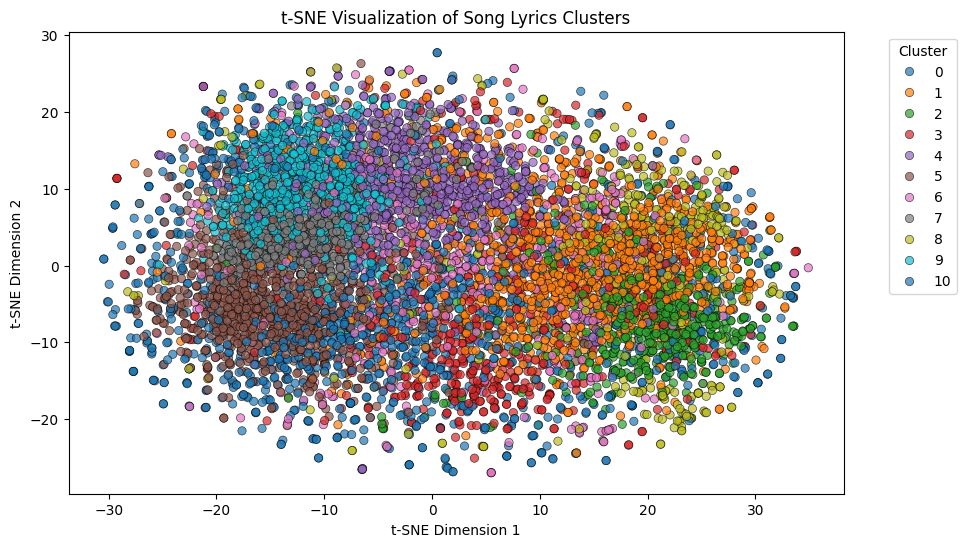

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tsne_x'], y=df['tsne_y'], hue=df['cluster'], palette='tab10', alpha=0.7, edgecolor='k')
plt.title("t-SNE Visualization of Song Lyrics Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

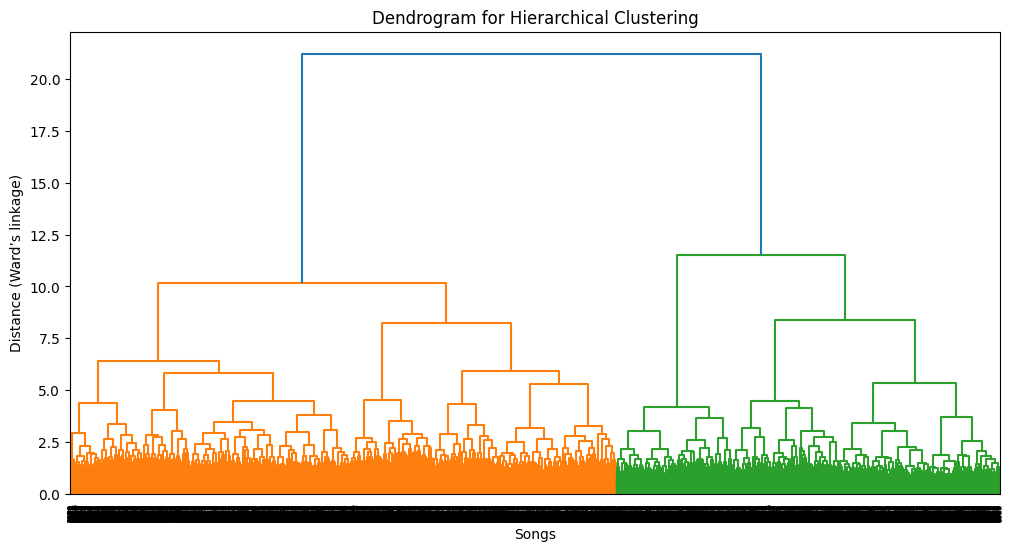

In [123]:
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(embeddings, method='ward')

plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=20)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Songs")
plt.ylabel("Distance (Ward’s linkage)")
plt.show()

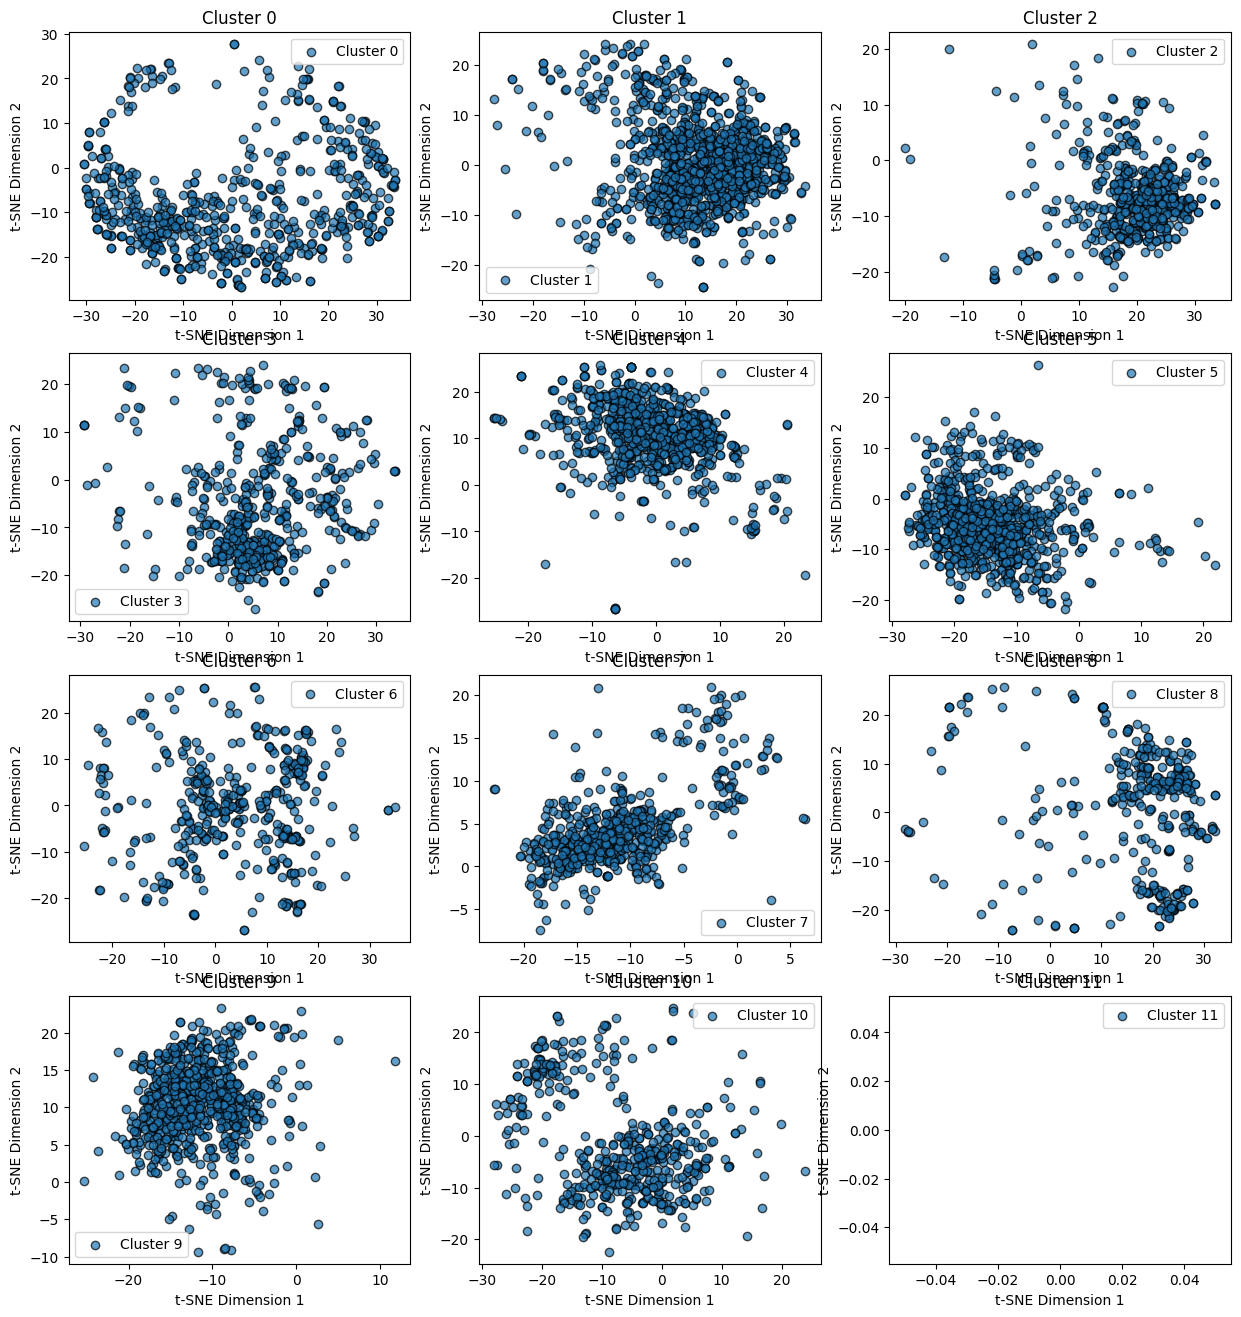

In [124]:
import math
cluster_n = 12
rows = math.ceil(cluster_n / 3)
fig_w = 3 * 5
fig_h = 4 * rows

plt.figure(figsize=(fig_w, fig_h))
for i in range(cluster_n):
    plt.subplot(rows, 3, i + 1)
    cluster_data = df[df['cluster'] == i]

    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'], alpha=0.7, edgecolor='k', label=f"Cluster {i}")
    plt.title(f"Cluster {i}")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()

# plt.tight_layout()
plt.show()

#### Hyperparameter Tuning & Metric Analysis

In [79]:
n_clusters_range = [8, 10, 11, 12]
linkage_methods = ['ward', 'complete', 'average']

results = []

for linkage in linkage_methods:
    for n_clusters in n_clusters_range:
        if linkage == 'ward':
            metric = 'euclidean'
        else:
            metric = 'cosine'

        clustering = AgglomerativeClustering(
            n_clusters=n_clusters,
            linkage=linkage,
            metric=metric
        )
        labels = clustering.fit_predict(embeddings)

        try:
            sil = silhouette_score(embeddings, labels, metric=metric)
            db = davies_bouldin_score(embeddings, labels)
            ch = calinski_harabasz_score(embeddings, labels)

            results.append({
                'n_clusters': n_clusters,
                'linkage': linkage,
                'affinity': metric,
                'Silhouette Score': sil,
                'Davies-Bouldin Score': db,
                'Calinski-Harabasz Score': ch
            })
        except Exception as e:
            print(f"Error for {linkage} linkage with {n_clusters} clusters: {e}")

metrics_agglo = pd.DataFrame(results)
metrics_agglo = metrics_agglo.sort_values(by='Silhouette Score', ascending=False)
metrics_agglo.reset_index(drop=True, inplace=True)


In [80]:
metrics_agglo

n_clusters   linkage   affinity  Silhouette Score  Davies-Bouldin Score  \
0            8   average     cosine          0.291709              1.673035   
1           10   average     cosine          0.279446              1.460983   
2           11   average     cosine          0.271672              1.565410   
3           12   average     cosine          0.264342              1.599043   
4            8  complete     cosine          0.083849              7.054289   
5           10  complete     cosine          0.079864              6.698258   
6           12  complete     cosine          0.036270              6.544809   
7           11  complete     cosine          0.035863              6.847893   
8            8      ward  euclidean         -0.006801              6.337418   
9           12      ward  euclidean         -0.024123              6.346039   
10          11      ward  euclidean         -0.024948              6.298738   
11          10      ward  euclidean         -0.025824              6.204238   

    Calinski-Harabasz Score  
0                  3.720212  
1                  3.272989  
2                  3.439089  
3                  3.388822  
4                 58.441799  
5                 48.460606  
6                 45.337055  
7                 49.146149  
8                116.835167  
9                 84.588875  
10                90.952873  
11                97.889687

#### Training on selected parameter

In [150]:
clustering = AgglomerativeClustering(
    n_clusters=11,
    linkage='complete',
    metric='cosine',
    distance_threshold=None
)

labels_agglo = clustering.fit_predict(embeddings)
df['agglo_cluster'] = labels_agglo + 1

In [151]:
df_train['agglo_cluster'] = labels_agglo + 1

In [102]:
df['agglo_cluster']

0       11
1        9
2       11
3        1
4        9
        ..
7361     4
7362     4
7363     4
7364    11
7365    11
Name: agglo_cluster, Length: 7303, dtype: int64

In [103]:
df['agglo_cluster'].value_counts()

agglo_cluster
11    3625
9     1858
4      716
7      441
10     175
3      171
1      159
8       55
2       39
6       32
5       32
Name: count, dtype: int64

#### Training Visualization

In [104]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50)
embeddings_2d = tsne.fit_transform(embeddings)

df['tsne_x'] = embeddings_2d[:, 0]
df['tsne_y'] = embeddings_2d[:, 1]

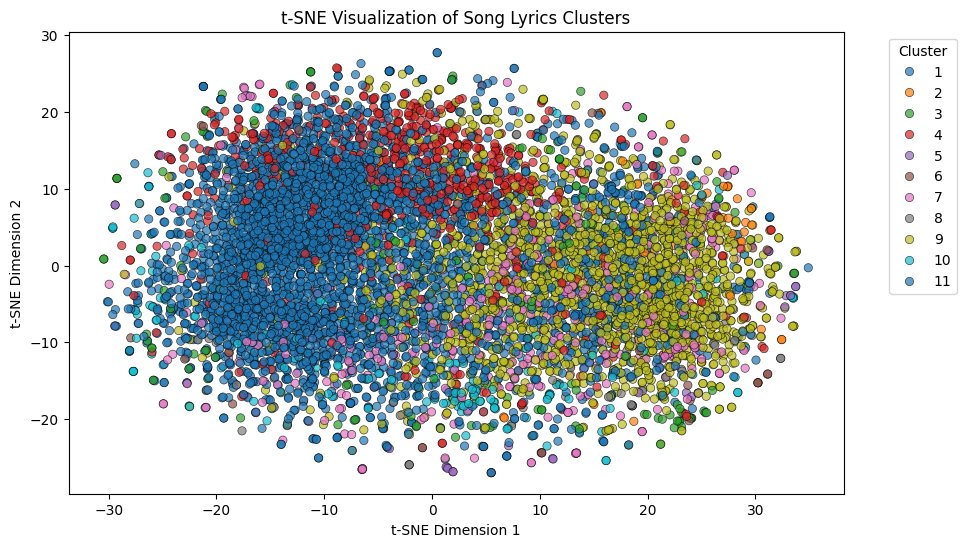

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tsne_x'], y=df['tsne_y'], hue=df['agglo_cluster'], palette='tab10', alpha=0.7, edgecolor='k')
plt.title("t-SNE Visualization of Song Lyrics Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

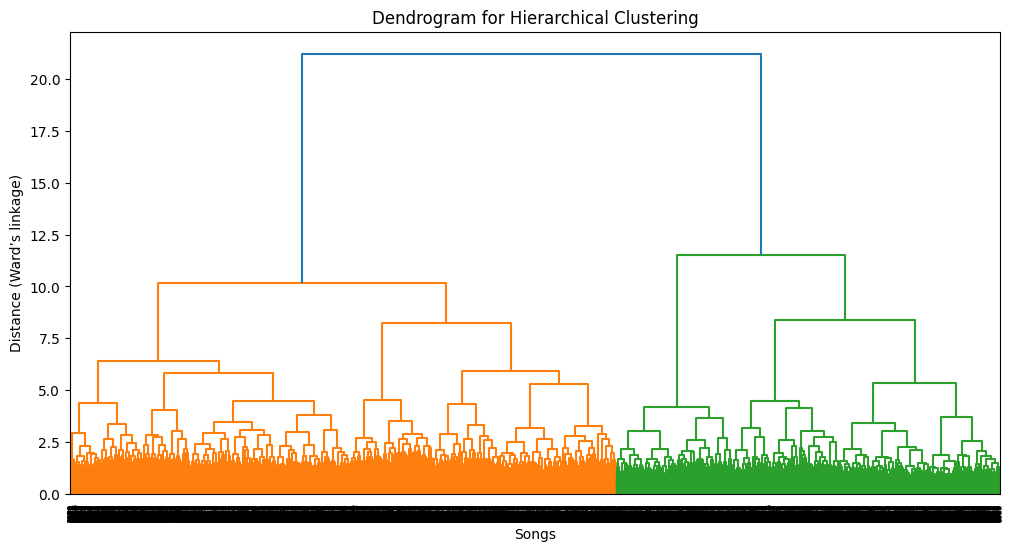

In [106]:
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(embeddings, method='ward')

plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=20)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Songs")
plt.ylabel("Distance (Ward’s linkage)")
plt.show()

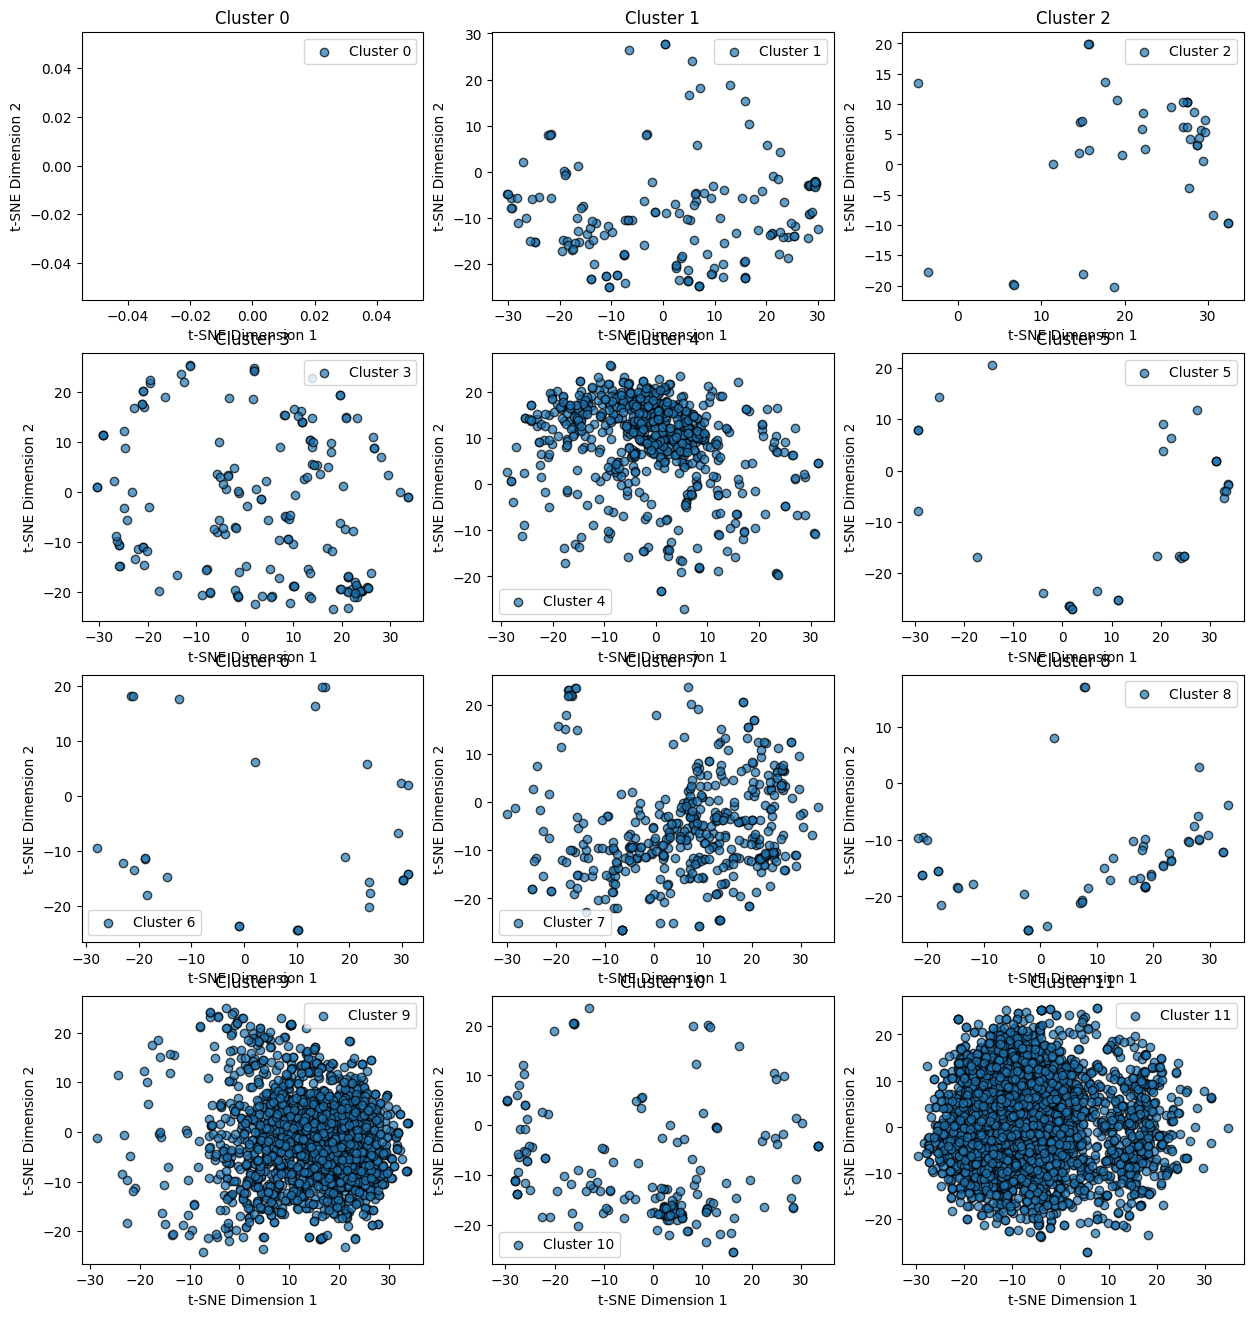

In [108]:
import math
cluster_n = 12
rows = math.ceil(cluster_n / 3)
fig_w = 3 * 5
fig_h = 4 * rows

plt.figure(figsize=(fig_w, fig_h))
for i in range(cluster_n):
    plt.subplot(rows, 3, i + 1)
    cluster_data = df[df['agglo_cluster'] == i]

    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'], alpha=0.7, edgecolor='k', label=f"Cluster {i}")
    plt.title(f"Cluster {i}")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()

# plt.tight_layout()
plt.show()

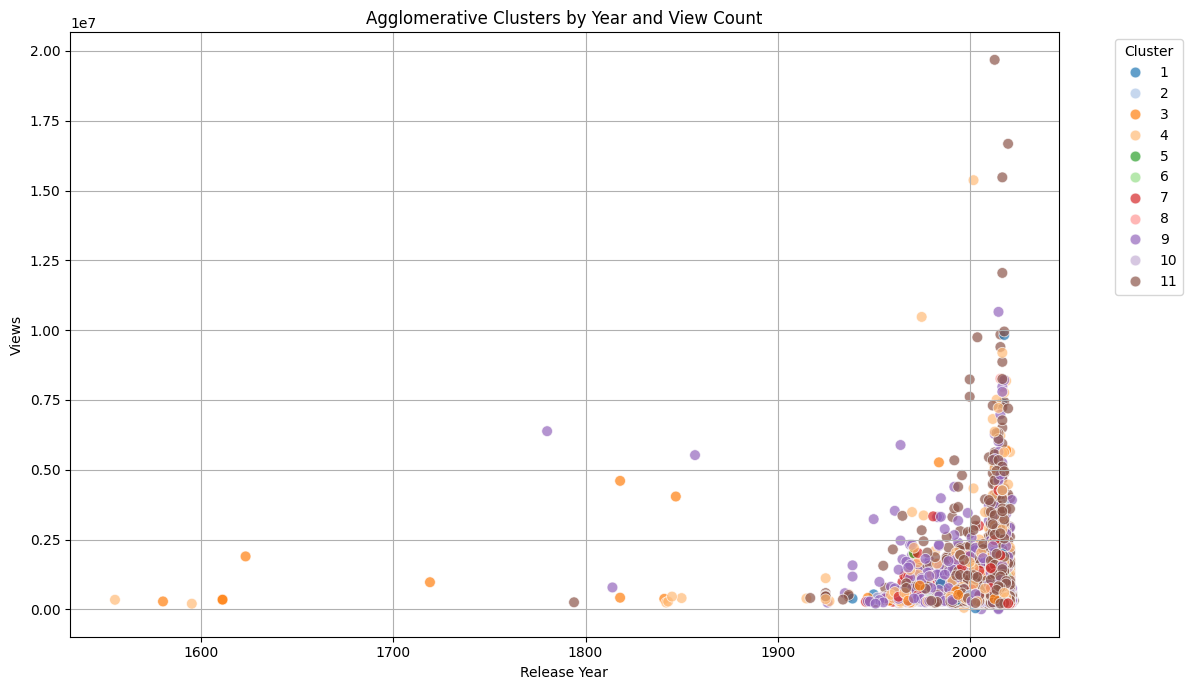

In [162]:
df_filtered = df_train[(df_train['year'] >= 1500) & (~df_train['year'].isna())]

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='year',
    y='views',
    hue='agglo_cluster',
    palette='tab20',
    alpha=0.7,
    s=60
)
plt.title("Agglomerative Clusters by Year and View Count")
plt.xlabel("Release Year")
plt.ylabel("Views")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Testing Modelling

In [125]:
clustering = AgglomerativeClustering(
    n_clusters=11,
    linkage='complete',
    metric='cosine',
    distance_threshold=None
)

labels_agglo = clustering.fit_predict(embeddings_test)
df_test['agglo_cluster'] = labels_agglo + 1

In [126]:
df_test

title                       artist  \
0    BTS - Your eyes tell English Translation  Genius English Translations   
1                                    Superman                       Eminem   
2                            Pussy Money Weed                    Lil Wayne   
3                              Therefore I Am                Billie Eilish   
4                                    Renegade              Big Red Machine   
..                                        ...                          ...   
806     BTS - Outro: Tear English Translation  Genius English Translations   
807                              Every Season                  Roddy Ricch   
808                                  Papercut                  Linkin Park   
809                                 Gas Pedal              Sage The Gemini   
810                                       GP4                        Logic   

     year    views                                                url  \
0    2020   574010  https://genius.com/Genius-English-Translations...   
1    2002  4716120          https://genius.com/Eminem-Superman-lyrics   
2    2007   392937  https://genius.com/Lil-Wayne-Pussy-Money-Weed-...   
3    2020  1712636  https://genius.com/Billie-Eilish-Therefore-I-A...   
4    2021   404770  https://genius.com/Big-Red-Machine-Renegade-ly...   
..    ...      ...                                                ...   
806  2018   712245  https://genius.com/Genius-English-Translations...   
807  2018   592105  https://genius.com/Roddy-Ricch-Every-Season-ly...   
808  2001   288929     https://genius.com/Linkin-Park-Papercut-lyrics   
809  2013   573690  https://genius.com/Sage-The-Gemini-Gas-Pedal-l...   
810  2020   227577                https://genius.com/Logic-GP4-lyrics   

                                                 lyric  \
0    [Verse 1: Jung Kook,\nV\n]\nWhy are my eyes fi...   
1    Dina Rae\nThey call me Superman\nLeap tall hoe...   
2    Oh, yes, I love her, like Egyptian\nShe's "Poi...   
3    I'm not your friend\nOr anything, damn\nYou th...   
4    I tapped on your window on your darkest night\...   
..                                                 ...   
806  My heart that's stained with belated self-loat...   
807  Beezo need cash only, you dig?\nThat boy Cassi...   
808  Why does it feel like night today?\nSomething ...   
809  Now speed up, gas pedal\nGas pedal (Gas pedal)...   
810  You and me\nGon' live together in this perfect...   

                                      lyric_proccessed  \
0    verse  jung kook\nv\n\nwhy are my eyes filled ...   
1    dina rae\nthey call me superman\nleap tall hoe...   
2    oh yes i love her like egyptian\nshe is poison...   
3    i am not your friend\nor anything damn\nyou th...   
4    i tapped on your window on your darkest night\...   
..                                                 ...   
806  my heart that is stained with belated selfloat...   
807  beezo need cash only you dig\nthat boy cassius...   
808  why does it feel like night today\nsomething i...   
809  now speed up gas pedal\ngas pedal gas pedal ga...   
810  you and me\ngon live together in this perfect ...   

                                                tokens  hdbscan_cluster  \
0    [verse, jung, kook, eye, filled, tear, hey, st...                9   
1    [dina, rae, call, superman, leap, tall, hoe, s...               10   
2    [yes, love, like, egyptian, poison, michael, b...                3   
3    [friend, anything, damn, think, man, think, th...               15   
4    [tapped, window, darkest, night, really, going...                2   
..                                                 ...              ...   
806  [heart, stained, belated, selfloathing, someon...                1   
807  [beezo, need, cash, dig, boy, cassius, married...               13   
808  [feel, like, night, today, something, right, t...                1   
809  [speed, gas, pedal, gas, pedal, gas, pedal, ga...                6   
810  [g

In [141]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50)
embeddings_2d = tsne.fit_transform(embeddings_test)

df_test['tsne_x'] = embeddings_2d[:, 0]
df_test['tsne_y'] = embeddings_2d[:, 1]

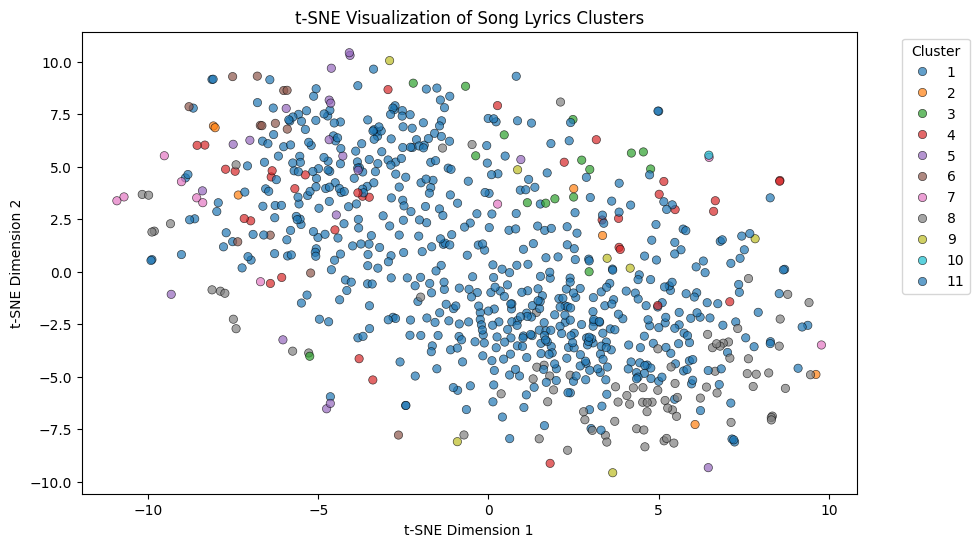

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_test['tsne_x'], y=df_test['tsne_y'], hue=df_test['agglo_cluster'], palette='tab10', alpha=0.7, edgecolor='k')
plt.title("t-SNE Visualization of Song Lyrics Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

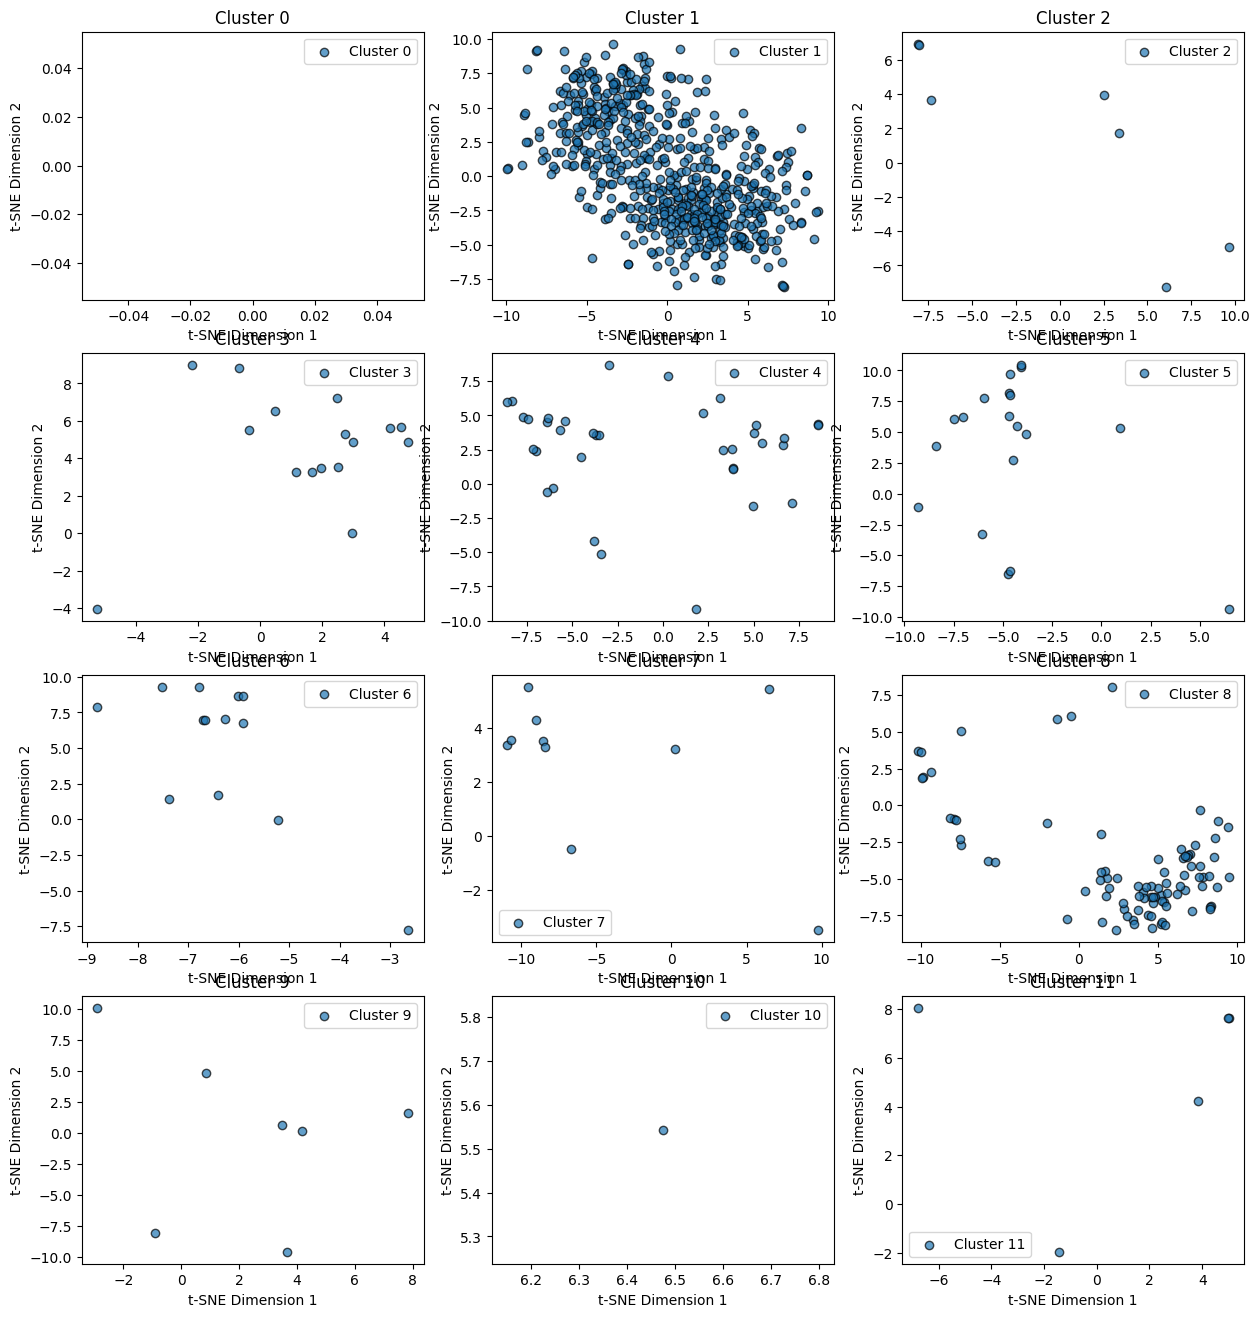

In [132]:
import math
cluster_n = 12
rows = math.ceil(cluster_n / 3)
fig_w = 3 * 5
fig_h = 4 * rows

plt.figure(figsize=(fig_w, fig_h))
for i in range(cluster_n):
    plt.subplot(rows, 3, i + 1)
    cluster_data = df_test[df_test['agglo_cluster'] == i]

    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'], alpha=0.7, edgecolor='k', label=f"Cluster {i}")
    plt.title(f"Cluster {i}")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()

# plt.tight_layout()
plt.show()

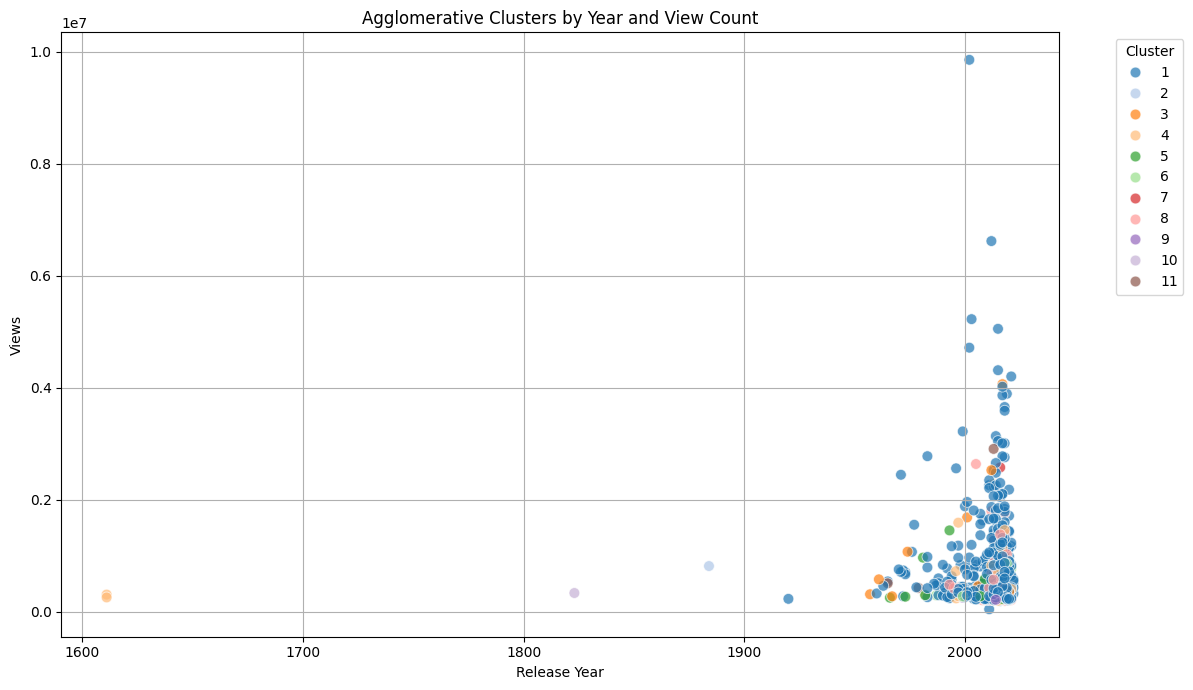

In [163]:
df_filtered = df_test[(df_test['year'] >= 1500) & (~df_test['year'].isna())]

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='year',
    y='views',
    hue='agglo_cluster',
    palette='tab20',
    alpha=0.7,
    s=60
)
plt.title("Agglomerative Clusters by Year and View Count")
plt.xlabel("Release Year")
plt.ylabel("Views")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Partitioned Clustering**: K Means

#### Hyperparameter Tuning & Metric Analysis

K=8, Silhouette Score=-0.0057
K=9, Silhouette Score=-0.0054
K=10, Silhouette Score=-0.0049
K=11, Silhouette Score=-0.0042
K=12, Silhouette Score=-0.0053


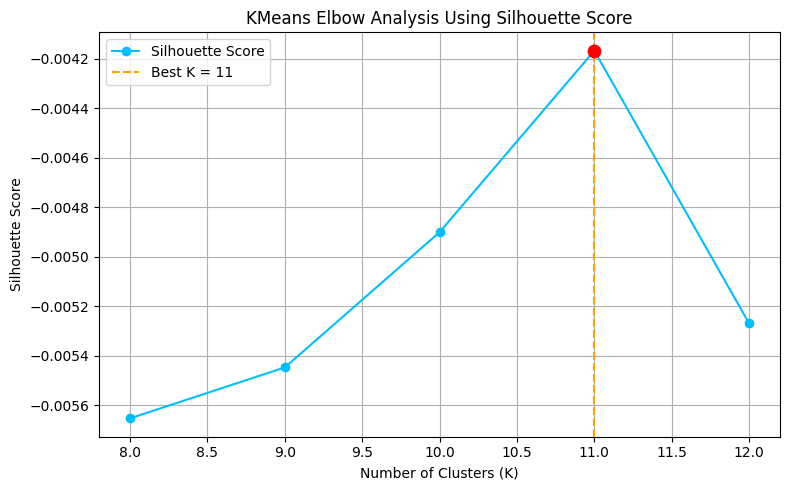

In [135]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values = range(8, 13)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="-", color="deepskyblue", label='Silhouette Score')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("KMeans Elbow Analysis Using Silhouette Score")
plt.grid(True)

best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)
plt.axvline(best_k, color='orange', linestyle='--', label=f'Best K = {best_k}')
plt.scatter(best_k, best_score, color='red', s=80, zorder=5)
plt.legend()
plt.tight_layout()

#### Training on selected parameter

In [136]:
optimal_k = 11
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['kmeans_clustering'] = kmeans.fit_predict(embeddings)

In [152]:
df_train['kmeans_clustering'] = kmeans.fit_predict(embeddings)

#### Training Visualization

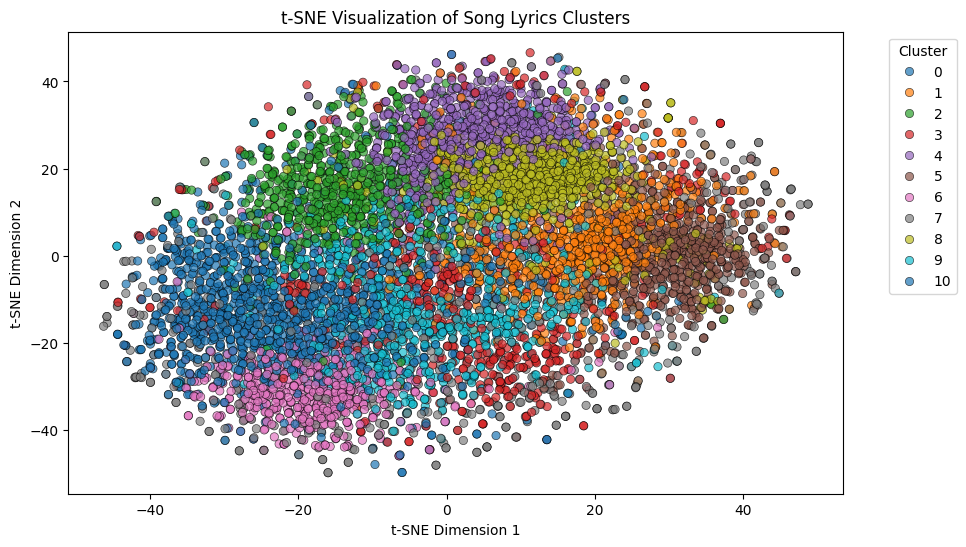

In [138]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

df['tsne_x'] = embeddings_2d[:, 0]
df['tsne_y'] = embeddings_2d[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tsne_x'], y=df['tsne_y'], hue=df['kmeans_clustering'], palette='tab10', alpha=0.7, edgecolor='k')
plt.title("t-SNE Visualization of Song Lyrics Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

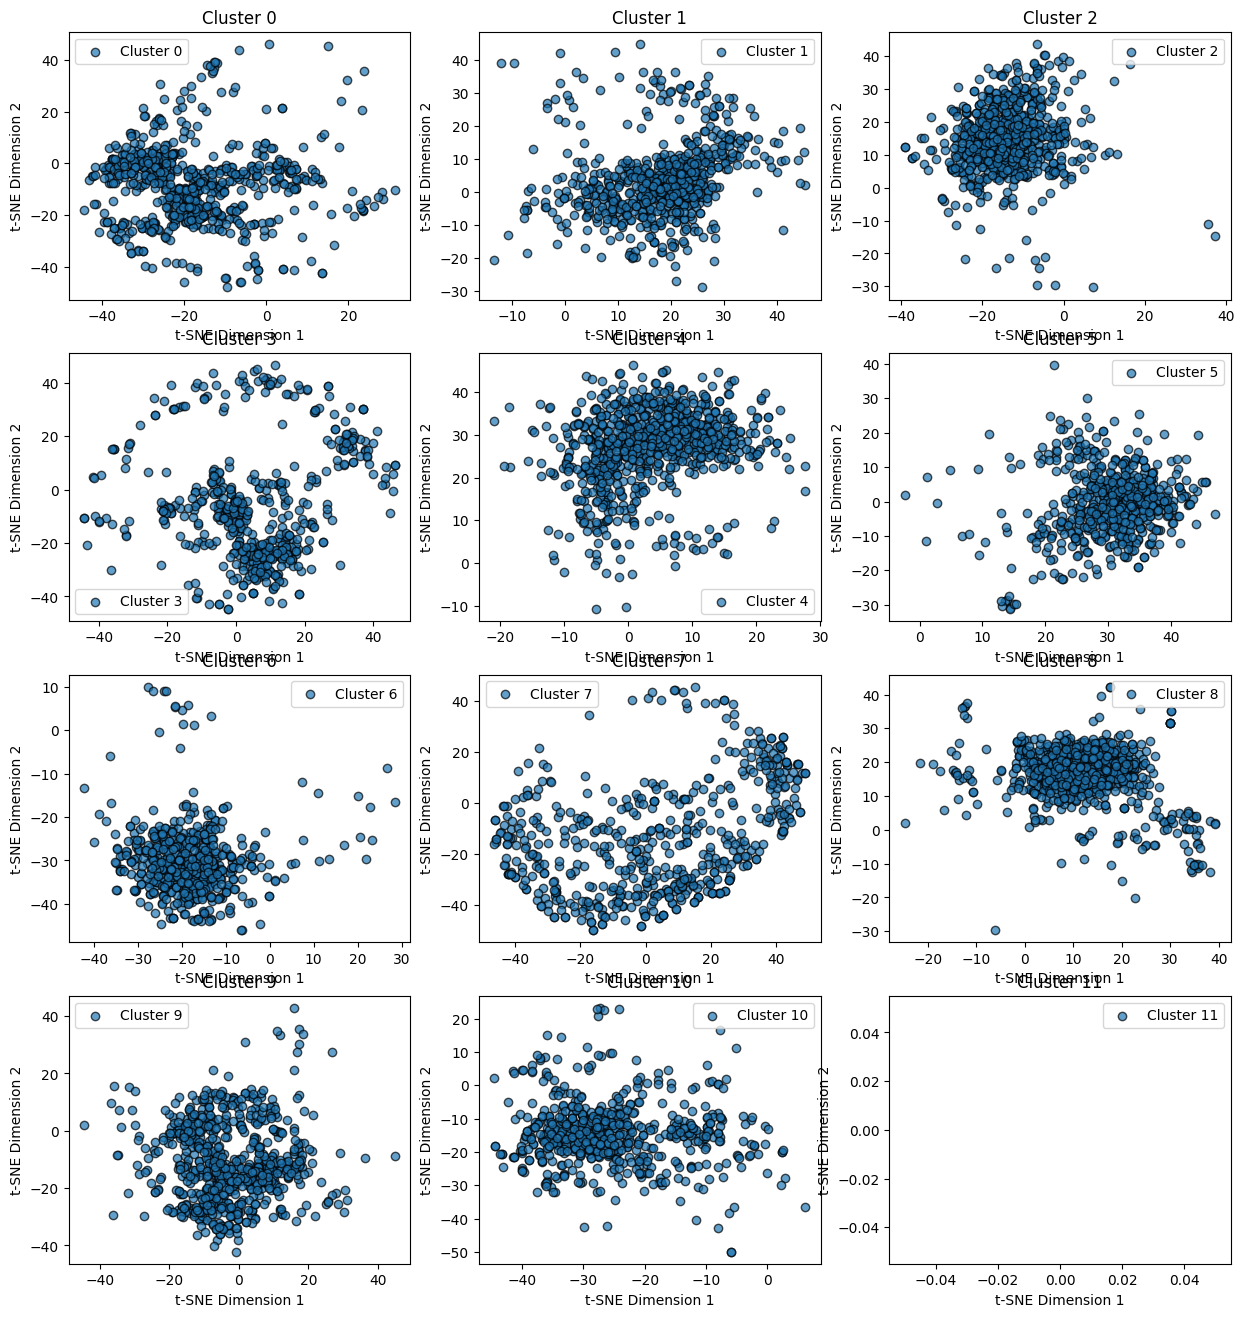

In [139]:
import math
cluster_n = 12
rows = math.ceil(cluster_n / 3)
fig_w = 3 * 5
fig_h = 4 * rows

plt.figure(figsize=(fig_w, fig_h))
for i in range(cluster_n):
    plt.subplot(rows, 3, i + 1)
    cluster_data = df[df['kmeans_clustering'] == i]

    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'], alpha=0.7, edgecolor='k', label=f"Cluster {i}")
    plt.title(f"Cluster {i}")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()

# plt.tight_layout()
plt.show()

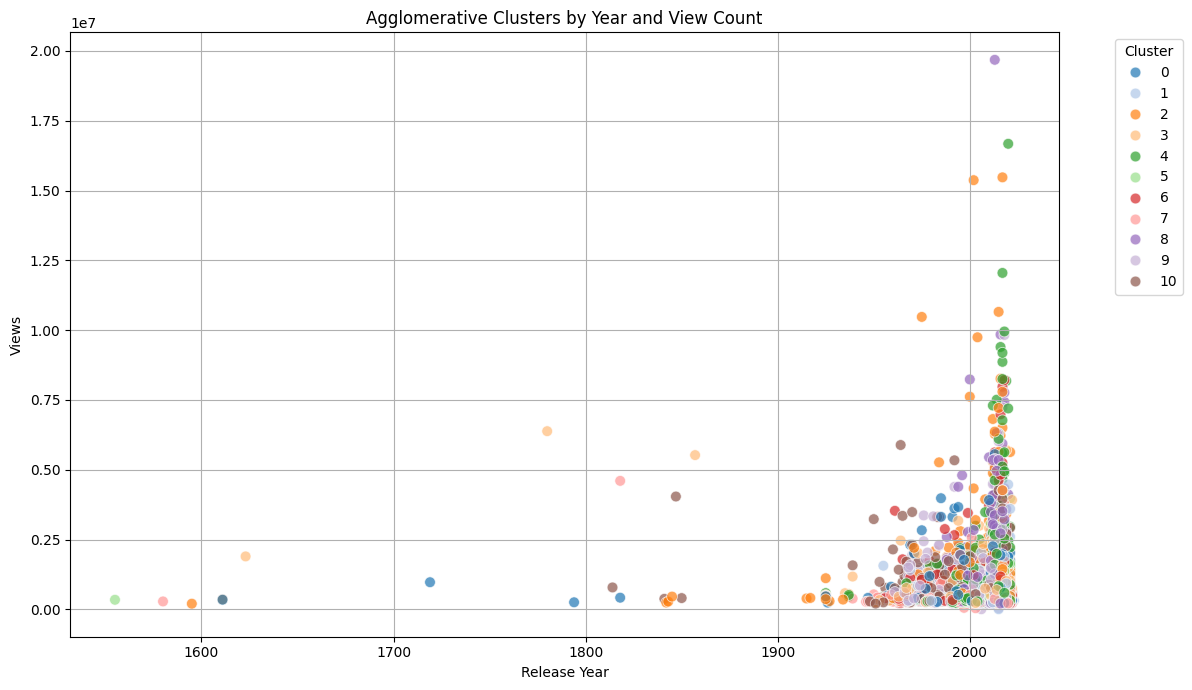

In [165]:
df_filtered = df_train[(df_train['year'] >= 1500) & (~df_train['year'].isna())]

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='year',
    y='views',
    hue='kmeans_clustering',
    palette='tab20',
    alpha=0.7,
    s=60
)
plt.title("Agglomerative Clusters by Year and View Count")
plt.xlabel("Release Year")
plt.ylabel("Views")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Testing Modelling

In [143]:
df_test['kmeans_clustering'] = kmeans.fit_predict(embeddings_test)

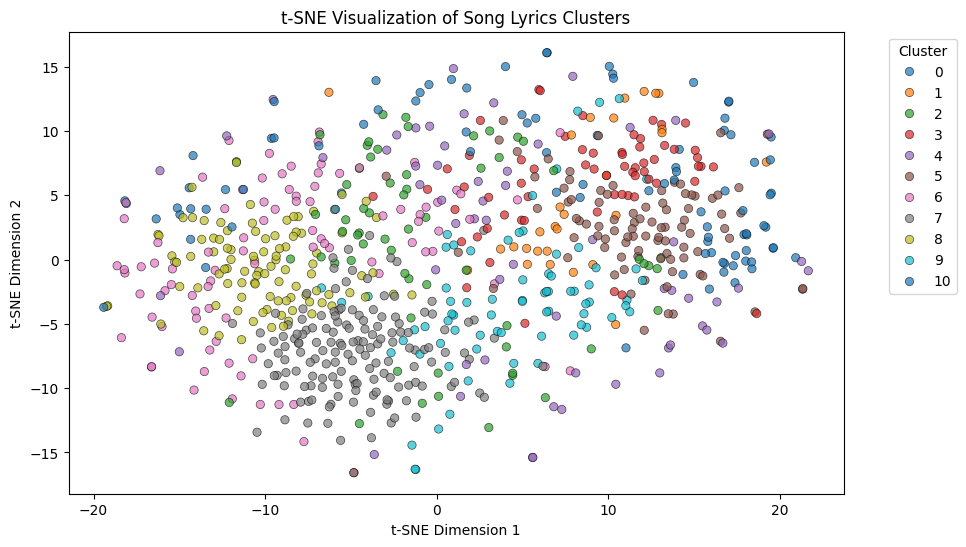

In [145]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings_test)

df_test['tsne_x'] = embeddings_2d[:, 0]
df_test['tsne_y'] = embeddings_2d[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_test['tsne_x'], y=df_test['tsne_y'], hue=df_test['kmeans_clustering'], palette='tab10', alpha=0.7, edgecolor='k')
plt.title("t-SNE Visualization of Song Lyrics Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

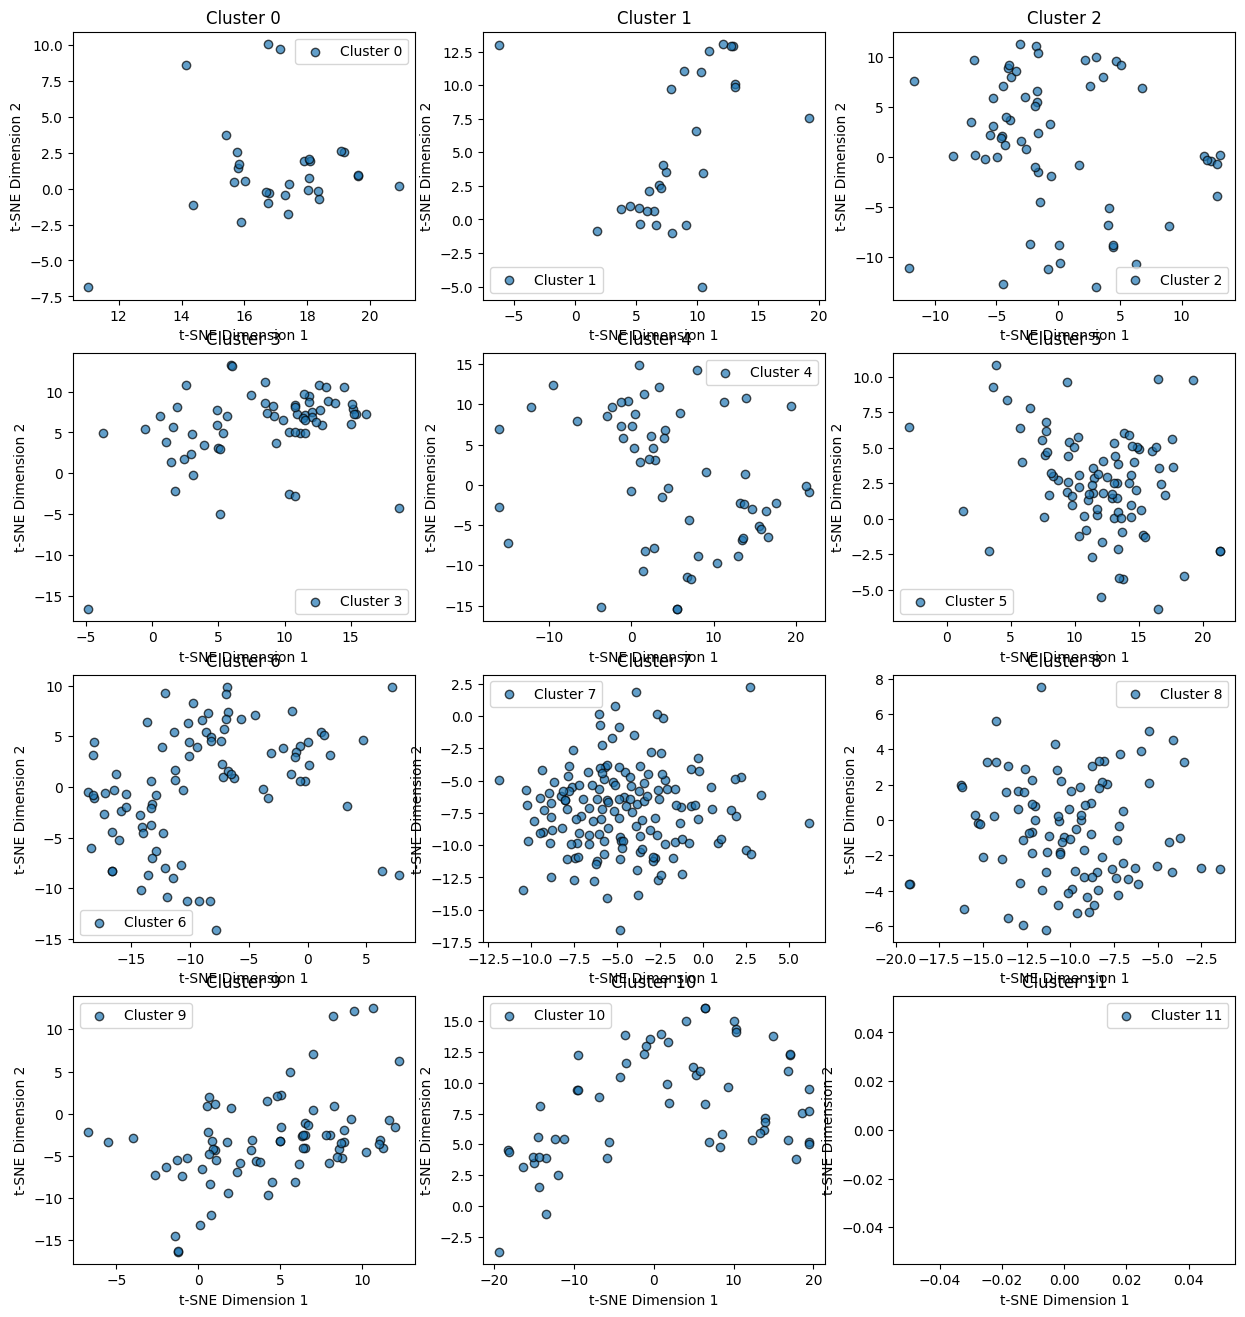

In [146]:
import math
cluster_n = 12
rows = math.ceil(cluster_n / 3)
fig_w = 3 * 5
fig_h = 4 * rows

plt.figure(figsize=(fig_w, fig_h))
for i in range(cluster_n):
    plt.subplot(rows, 3, i + 1)
    cluster_data = df_test[df_test['kmeans_clustering'] == i]

    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'], alpha=0.7, edgecolor='k', label=f"Cluster {i}")
    plt.title(f"Cluster {i}")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()

# plt.tight_layout()
plt.show()

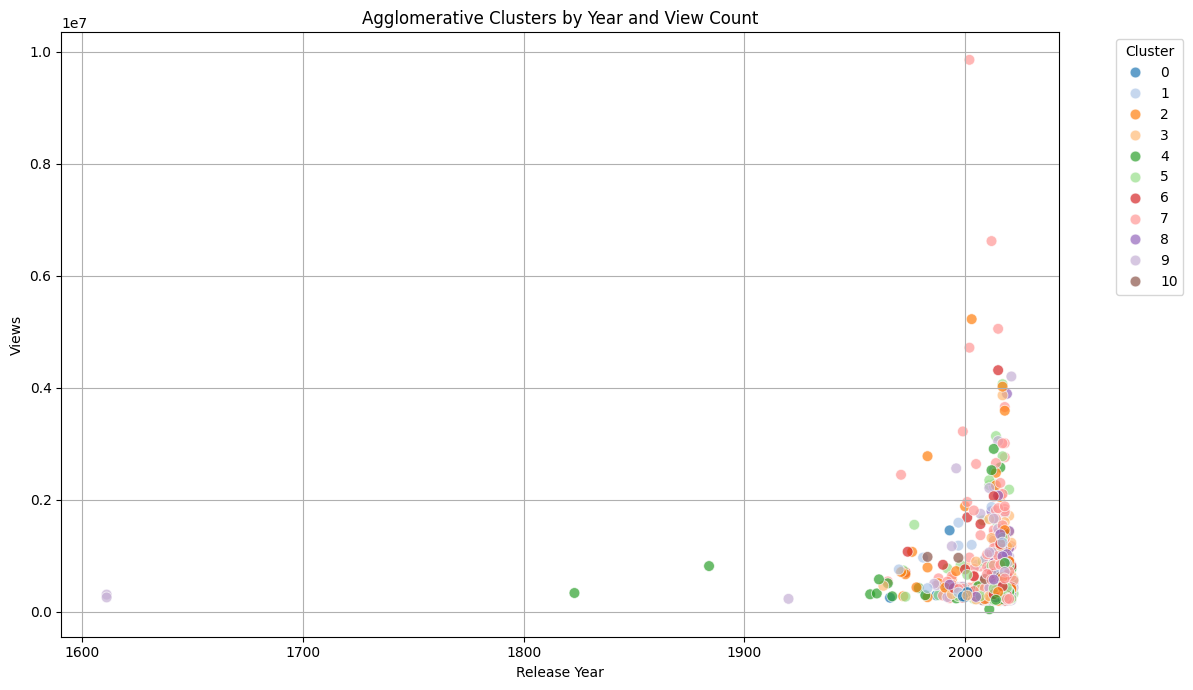

In [166]:
df_filtered = df_test[(df_test['year'] >= 1500) & (~df_test['year'].isna())]

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='year',
    y='views',
    hue='kmeans_clustering',
    palette='tab20',
    alpha=0.7,
    s=60
)
plt.title("Agglomerative Clusters by Year and View Count")
plt.xlabel("Release Year")
plt.ylabel("Views")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Density-based Clustering**: HDBSCAN

In [12]:
embeddings

array([[-0.08094806,  0.05172426,  0.05169685, ...,  0.05624826,
         0.00397796, -0.0213622 ],
       [-0.05183048, -0.02663404,  0.07246941, ...,  0.03668395,
        -0.01186768, -0.07760921],
       [-0.03693969,  0.0161051 ,  0.09730201, ..., -0.03849171,
         0.02745882, -0.01638548],
       ...,
       [ 0.01010028, -0.09600256, -0.00334166, ...,  0.00337816,
         0.00042883, -0.05548247],
       [-0.05505428, -0.07757649,  0.04838704, ..., -0.02041804,
        -0.03278511, -0.06098106],
       [-0.0765857 , -0.0299759 , -0.01065965, ...,  0.03395786,
        -0.01092349, -0.03918597]], dtype=float32)

#### Simple Training

In [13]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, metric='euclidean')
df['hdbscan_cluster'] = clusterer.fit_predict(embeddings)
df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


title                                             tokens  \
0               Untitled  [reason, miscommunication, lying, face, immatu...   
1             Dandelions  [maybe, way, say, name, maybe, way, play, game...   
2                 I Like  [pull, new, gwag, sky, blue, body, paint, soow...   
3                Kiss Me  [yeah, feelin, everything, hate, love, love, l...   
4  I Say A Little Prayer  [say, little, prayer, moment, wake, put, makeu...   

                                         lyrics_text  cluster_2  
0  reason miscommunication lying face immaturity ...         -1  
1  maybe way say name maybe way play game good ne...         -1  
2  pull new gwag sky blue body paint soowoo insid...         -1  
3  yeah feelin everything hate love love lust lus...         -1  
4  say little prayer moment wake put makeup makeu...         -1

#### Hyperparameter Tuning on Best Silhoutte Score

In [24]:
from sklearn.metrics.pairwise import cosine_distances
import umap.umap_ as umap

reducer = umap.UMAP(n_components=10, metric='cosine', random_state=42)
reduced_embeddings = reducer.fit_transform(embeddings)
distance_matrix = cosine_distances(reduced_embeddings).astype(np.float64)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [49]:
from sklearn.neighbors import NearestNeighbors

param_grid = {
    'min_cluster_size': [15, 17, 20, 22, 25],
    'min_samples': [4, 5, 8, 10, 12, 15, 17]
}

best_config = None
best_score = -1
best_labels = None

for min_cluster_size in param_grid['min_cluster_size']:
    for min_samples in param_grid['min_samples']:
        clusterer = hdbscan.HDBSCAN(
            min_cluster_size=min_cluster_size,
            min_samples=min_samples,
            metric='precomputed',
            cluster_selection_method='leaf'
        )
        raw_labels = clusterer.fit_predict(distance_matrix)

        mask_core = raw_labels != -1
        mask_noise = raw_labels == -1
        labels = raw_labels.copy()

        if np.any(mask_noise):
            nn = NearestNeighbors(n_neighbors=1, metric='cosine')
            nn.fit(reduced_embeddings[mask_core])
            _, indices = nn.kneighbors(reduced_embeddings[mask_noise])
            labels[mask_noise] = raw_labels[mask_core][indices[:, 0]]

        n_clusters = len(set(labels))

        if 12 <= n_clusters <= 18:
            score = silhouette_score(reduced_embeddings, labels, metric='cosine')
            print(f"Clusters: {n_clusters}, Silhouette: {score:.3f}, min_size={min_cluster_size}, min_samples={min_samples}")
            if score > best_score:
                best_score = score
                best_config = (min_cluster_size, min_samples)
                best_labels = labels
        else:
            print(f"min_size={min_cluster_size}, min_samples={min_samples} → {n_clusters} clusters (ignored)")

print("Best Config:", best_config, "→ Silhouette Score:", best_score)

min_size=15, min_samples=4 → 53 clusters (ignored)
min_size=15, min_samples=5 → 40 clusters (ignored)
min_size=15, min_samples=8 → 32 clusters (ignored)
min_size=15, min_samples=10 → 24 clusters (ignored)
min_size=15, min_samples=12 → 24 clusters (ignored)
Clusters: 16, Silhouette: 0.158, min_size=15, min_samples=15
Clusters: 17, Silhouette: 0.055, min_size=15, min_samples=17
min_size=17, min_samples=4 → 42 clusters (ignored)
min_size=17, min_samples=5 → 35 clusters (ignored)
min_size=17, min_samples=8 → 27 clusters (ignored)
min_size=17, min_samples=10 → 23 clusters (ignored)
min_size=17, min_samples=12 → 20 clusters (ignored)
Clusters: 15, Silhouette: 0.172, min_size=17, min_samples=15
Clusters: 15, Silhouette: 0.106, min_size=17, min_samples=17
min_size=20, min_samples=4 → 32 clusters (ignored)
min_size=20, min_samples=5 → 30 clusters (ignored)
min_size=20, min_samples=8 → 21 clusters (ignored)
min_size=20, min_samples=10 → 20 clusters (ignored)
Clusters: 15, Silhouette: 0.183, min_

#### Metric Analysis: Pick top three configurations

In [50]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

configs = [
    {'min_cluster_size': 25, 'min_samples': 12},
    {'min_cluster_size': 25, 'min_samples': 15},
    {'min_cluster_size': 22, 'min_samples': 12},
]

results = []

for config in configs:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=config['min_cluster_size'],
        min_samples=config['min_samples'],
        metric='precomputed',
        cluster_selection_method='leaf'
    )

    raw_labels = clusterer.fit_predict(distance_matrix)
    mask = raw_labels != -1
    n_clusters = len(set(raw_labels[mask])) - (1 if -1 in raw_labels else 0)

    result = {
        'min_cluster_size': config['min_cluster_size'],
        'min_samples': config['min_samples'],
        'Clusters': n_clusters
    }

    if n_clusters > 1 and np.sum(mask) > 1:
        sil_core = silhouette_score(reduced_embeddings[mask], raw_labels[mask], metric='cosine')

        labels = raw_labels.copy()
        if np.any(raw_labels == -1):
            nn = NearestNeighbors(n_neighbors=1, metric='cosine')
            nn.fit(reduced_embeddings[mask])
            noise_mask = ~mask
            _, indices = nn.kneighbors(reduced_embeddings[noise_mask])
            labels[noise_mask] = raw_labels[mask][indices[:, 0]]

        sil_full = silhouette_score(reduced_embeddings, labels, metric='cosine')
        db_score = davies_bouldin_score(reduced_embeddings, labels)
        ch_score = calinski_harabasz_score(reduced_embeddings, labels)
        cluster_sizes = pd.Series(labels).value_counts().values

        result.update({
            'Silhouette (core)': sil_core,
            'Silhouette (full)': sil_full,
            'Davies-Bouldin': db_score,
            'Calinski-Harabasz': ch_score,
            'Cluster Sizes': cluster_sizes
        })
    else:
        result.update({
            'Silhouette (core)': None,
            'Silhouette (full)': None,
            'Davies-Bouldin': None,
            'Calinski-Harabasz': None,
            'Cluster Sizes': None
        })

    results.append(result)

df_results = pd.DataFrame(results)
df_results

min_cluster_size  min_samples  Clusters  Silhouette (core)  \
0                25           12        11           0.718504   
1                25           15        11           0.678635   
2                22           12        12           0.713116   

   Silhouette (full)  Davies-Bouldin  Calinski-Harabasz  \
0           0.209870        1.553840        2651.771484   
1           0.174362        1.685464        2407.120117   
2           0.197567        1.546220        2521.659424   

                                       Cluster Sizes  
0  [1068, 936, 823, 750, 732, 705, 622, 527, 487,...  
1  [1052, 1042, 919, 809, 672, 651, 611, 470, 398...  
2  [1068, 871, 823, 750, 730, 705, 563, 522, 397,...

#### Training on selected parameter

In [51]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=25,
    min_samples=12,
    metric='precomputed',
    cluster_selection_method='leaf'
)

raw_labels = clusterer.fit_predict(distance_matrix)

df['hdbscan_cluster'] = raw_labels

labels = raw_labels.copy()
mask_core = raw_labels != -1
mask_noise = raw_labels == -1

if np.any(mask_noise):
    nn = NearestNeighbors(n_neighbors=1, metric='cosine')
    nn.fit(reduced_embeddings[mask_core])
    _, indices = nn.kneighbors(reduced_embeddings[mask_noise])
    labels[mask_noise] = raw_labels[mask_core][indices[:, 0]]

df['hdbscan_cluster'] = labels

In [60]:
df_train['hdbscan_cluster'] = labels

In [52]:
df

title  \
0                  Untitled   
1                Dandelions   
2                    I Like   
3                   Kiss Me   
4     I Say A Little Prayer   
...                     ...   
7361             Ganja Burn   
7362        I Kissed a Girl   
7363        One Shot 2 Shot   
7364                Frontin   
7365           Karma Police   

                                                 tokens  \
0     [reason, miscommunication, lying, face, immatu...   
1     [maybe, way, say, name, maybe, way, play, game...   
2     [pull, new, gwag, sky, blue, body, paint, soow...   
3     [yeah, feelin, everything, hate, love, love, l...   
4     [say, little, prayer, moment, wake, put, makeu...   
...                                                 ...   
7361  [ayo, world, turn, blunt, burn, fashion, icon,...   
7362  [got, brave, drink, hand, lost, discretion, us...   
7363  [one, shot, two, shot, three, shot, four, shot...   
7364  [want, sound, full, rude, looking, dude, love,...   
7365  [karma, police, arrest, man, talk, math, buzz,...   

                                            lyrics_text  hdbscan_cluster  
0     reason miscommunication lying face immaturity ...                5  
1     maybe way say name maybe way play game good ne...                3  
2     pull new gwag sky blue body paint soowoo insid...               11  
3     yeah feelin everything hate love love lust lus...                5  
4     say little prayer moment wake put makeup makeu...                5  
...                                                 ...              ...  
7361  ayo world turn blunt burn fashion icon audrey ...                9  
7362  got brave drink hand lost discretion used want...                1  
7363  one shot two shot three shot four shot hear gu...                7  
7364  want sound full rude looking dude love sorry b...                1  
7365  karma police arrest man talk math buzz like fr...                0  

[7303 rows x 4 columns]

In [53]:
df['hdbscan_cluster'].nunique()

12

In [54]:
df['hdbscan_cluster'].value_counts()


hdbscan_cluster
5     1068
7      936
11     823
1      750
0      732
6      705
10     622
9      527
8      487
4      295
2      271
3       87
Name: count, dtype: int64

#### Training Visualization

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


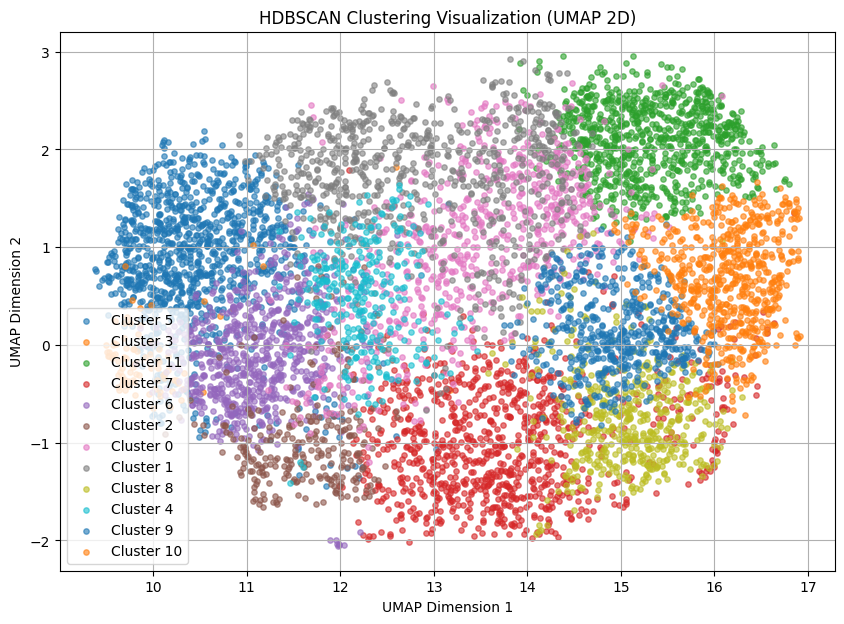

In [55]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
unique_labels = df['hdbscan_cluster'].unique()

for label in unique_labels:
    mask = df['hdbscan_cluster'] == label
    plt.scatter(embedding_2d[mask, 0],
                embedding_2d[mask, 1],
                label=f"Cluster {label}" if label != -1 else "Noise (-1)",
                s=15, alpha=0.6)

plt.title("HDBSCAN Clustering Visualization (UMAP 2D)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


In [61]:
df_train

title             artist  year    views  \
0                  Untitled  Rex Orange County  2017   292064   
1                Dandelions            Ruth B.  2017   587288   
2                    I Like            G Herbo  2017   204698   
3                   Kiss Me         Ed Sheeran  2011   434377   
4     I Say A Little Prayer    Aretha Franklin  1968   401893   
...                     ...                ...   ...      ...   
7361             Ganja Burn        Nicki Minaj  2018   597004   
7362        I Kissed a Girl         Katy Perry  2008   748259   
7363        One Shot 2 Shot             Eminem  2004   285353   
7364                Frontin  Pharrell Williams  2003   228883   
7365           Karma Police          Radiohead  1997  1772106   

                                                    url  \
0     https://genius.com/Rex-Orange-County-Untitled-...   
1           https://genius.com/Ruth-B-Dandelions-lyrics   
2              https://genius.com/G-Herbo-I-Like-lyrics   
3          https://genius.com/Ed-Sheeran-Kiss-Me-lyrics   
4     https://genius.com/Aretha-Franklin-I-Say-A-Lit...   
...                                                 ...   
7361   https://genius.com/Nicki-Minaj-Ganja-Burn-lyrics   
7362  https://genius.com/Katy-Perry-I-Kissed-a-Girl-...   
7363   https://genius.com/Eminem-One-Shot-2-Shot-lyrics   
7364  https://genius.com/Pharrell-Williams-Frontin-l...   
7365   https://genius.com/Radiohead-Karma-Police-lyrics   

                                                  lyric  \
0     So if for any reason there's some miscommunica...   
1     Maybe it's the way you say my name\nMaybe it's...   
2     Pull up in a new G-Wag'\nSky blue body paint, ...   
3     Yeah, I've been feelin' everything\nFrom hate ...   
4     (I say a little prayer for you)\nThe moment I ...   
...                                                 ...   
7361  Ayo, as the world turns, the blunt burns\nFash...   
7362  I got so brave, drink in hand\nLost my discret...   
7363  One shot, two shot, three shots, four shots\nA...   
7364  Don't wanna sound full of myself or rude\nBut ...   
7365  Karma police, arrest this man\nHe talks in mat...   

                                       lyric_proccessed  \
0     so if for any reason there is some miscommunic...   
1     maybe it is the way you say my name\nmaybe it ...   
2     pull up in a new gwag\nsky blue body paint soo...   
3     yeah i have been feelin everything\nfrom hate ...   
4     i say a little prayer for you\nthe moment i wa...   
...                                                 ...   
7361  ayo as the world turns the blunt burns\nfashio...   
7362  i got so brave drink in hand\nlost my discreti...   
7363  one shot two shot three shots four shots\nall ...   
7364  do not want to sound full of myself or rude\nb...   
7365  karma police arrest this man\nhe talks in math...   

                                                 tokens  hdbscan_cluster  
0     [reason, miscommunication, lying, face, immatu...                5  
1     [maybe, way, say, name, maybe, way, play, game...                3  
2     [pull, new, gwag, sky, blue, body, paint, soow...               11  
3     [yeah, feelin, everything, hate, love, love, l...                5  
4     [say, little, prayer, moment, wake, put, makeu...                5  
...                                                 ...              ...  
7361  [ayo, world, turn, blunt, burn, fashion, icon,...                9  
7362  [got, brave, drink, hand, lost, discretion, us...                1  
7363  [one, shot, two, shot, three, shot, four, shot...                7  
7364  [want, sound, full, rude, looking, dude, love,...                1  
7365  [karma, police, arrest, man, talk, math, buzz,...                0  

[7303 rows x 9 columns]

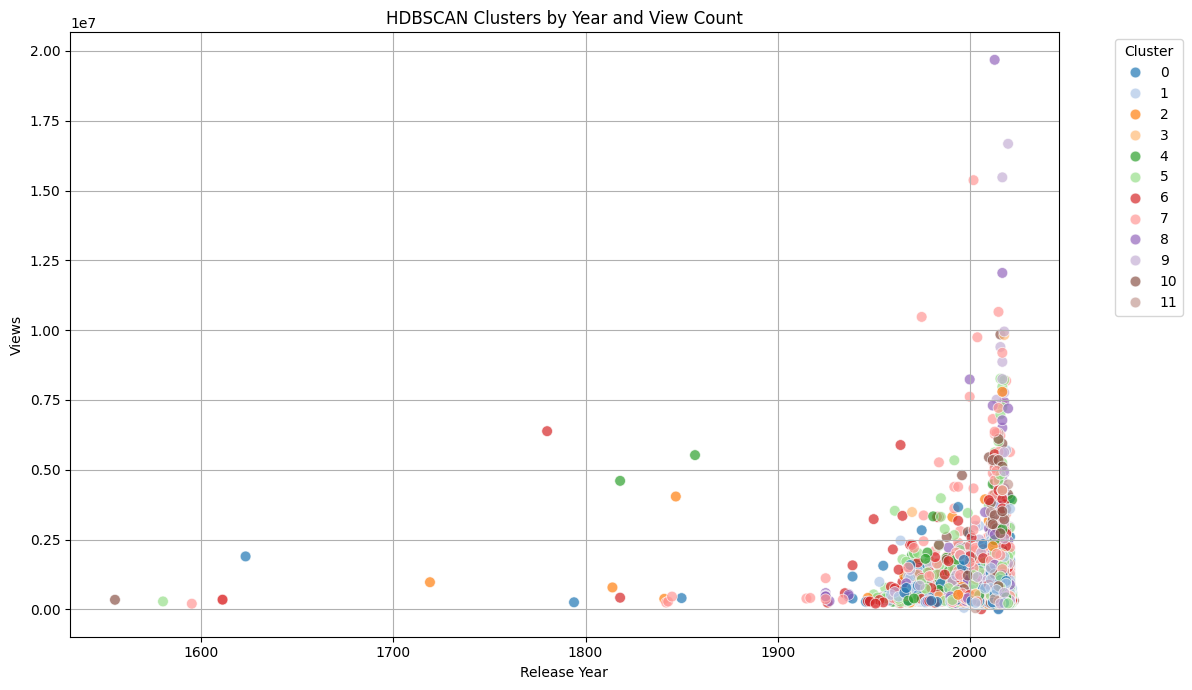

In [68]:
df_filtered = df_train[(df_train['year'] >= 1500) & (~df_train['year'].isna())]

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='year',
    y='views',
    hue='hdbscan_cluster',
    palette='tab20',
    alpha=0.7,
    s=60
)
plt.title("HDBSCAN Clusters by Year and View Count")
plt.xlabel("Release Year")
plt.ylabel("Views")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Testing Modelling

In [62]:
reduced_test = reducer.transform(embeddings_test)
distance_matrix_test = cosine_distances(reduced_test).astype(np.float64)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [63]:
clusterer_test = hdbscan.HDBSCAN(
    min_cluster_size=20,
    min_samples=5,
    metric='precomputed',
    cluster_selection_method='leaf'
)

raw_labels_test = clusterer_test.fit_predict(distance_matrix_test)
df_test['hdbscan_cluster'] = raw_labels_test

labels_test = raw_labels_test.copy()
mask_core = raw_labels_test != -1
mask_noise = raw_labels_test == -1

if np.any(mask_noise):
    nn = NearestNeighbors(n_neighbors=1, metric='cosine')
    nn.fit(reduced_test[mask_core])
    _, indices = nn.kneighbors(reduced_test[mask_noise])
    labels_test[mask_noise] = raw_labels_test[mask_core][indices[:, 0]]

df_test['hdbscan_cluster'] = labels_test

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


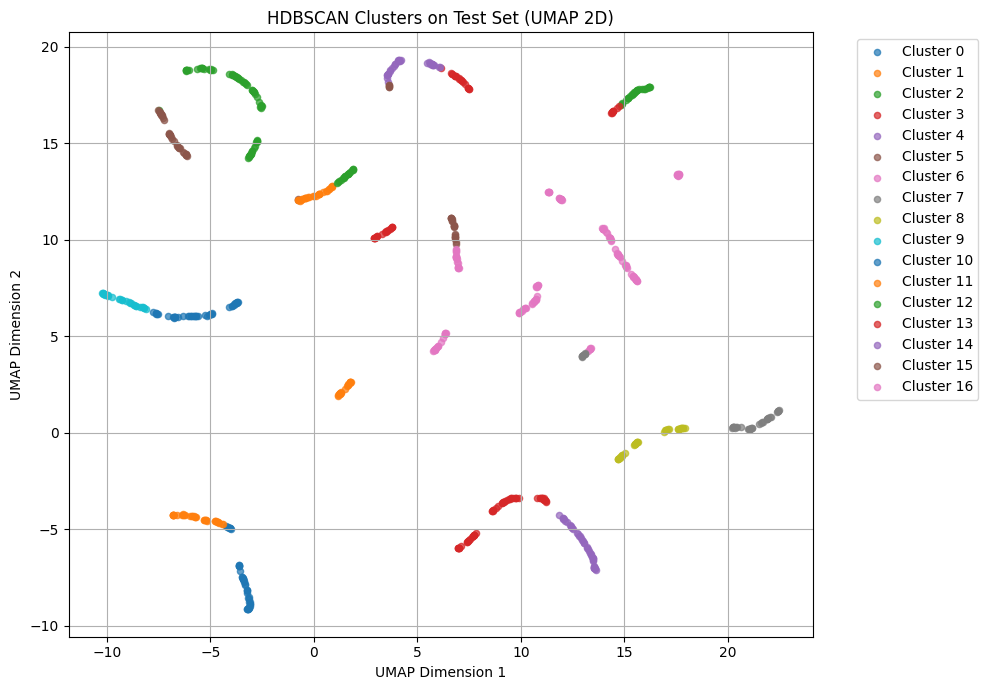

In [64]:
umap_2d = umap.UMAP(n_components=2, metric='cosine', random_state=42)
test_2d = umap_2d.fit_transform(reduced_test)

labels_test = df_test['hdbscan_cluster'].values
unique_labels = np.unique(labels_test)

plt.figure(figsize=(10, 7))
for label in unique_labels:
    mask = labels_test == label
    plt.scatter(test_2d[mask, 0], test_2d[mask, 1], s=20, alpha=0.7, label=f'Cluster {label}')

plt.title("HDBSCAN Clusters on Test Set (UMAP 2D)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

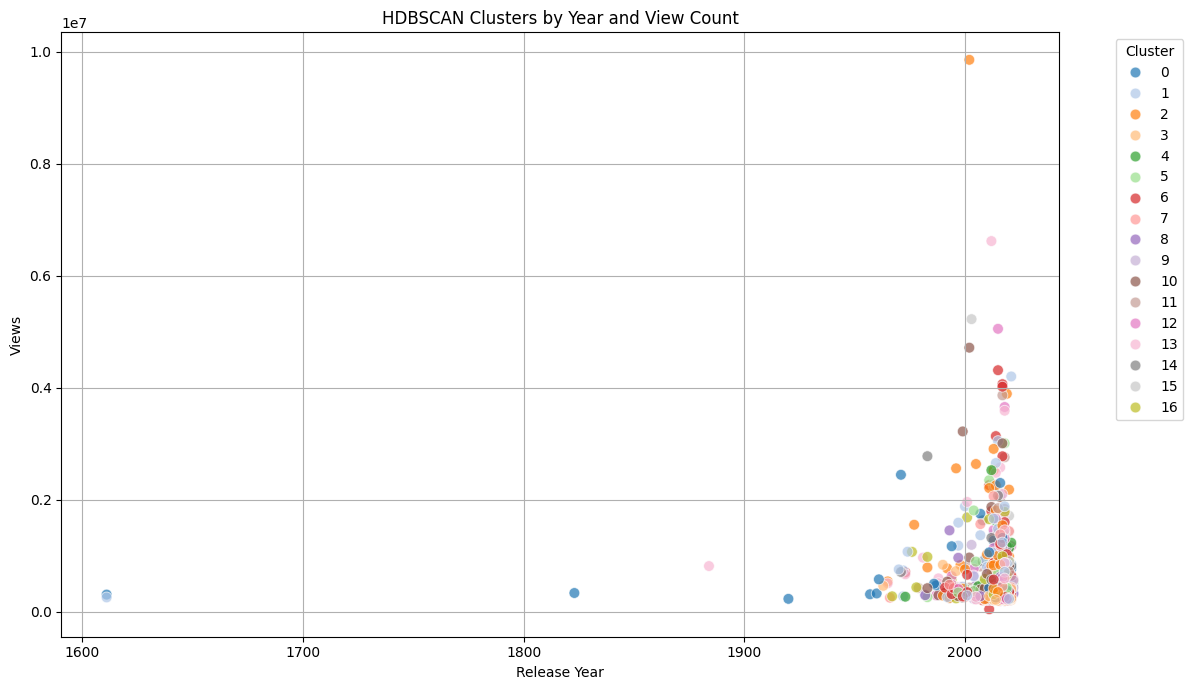

In [69]:
df_filtered_test = df_test[(df_test['year'] >= 1500) & (~df_test['year'].isna())]

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered_test,
    x='year',
    y='views',
    hue='hdbscan_cluster',
    palette='tab20',
    alpha=0.7,
    s=60
)
plt.title("HDBSCAN Clusters by Year and View Count")
plt.xlabel("Release Year")
plt.ylabel("Views")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Clustering Result



In [153]:
df_train

title             artist  year    views  \
0                  Untitled  Rex Orange County  2017   292064   
1                Dandelions            Ruth B.  2017   587288   
2                    I Like            G Herbo  2017   204698   
3                   Kiss Me         Ed Sheeran  2011   434377   
4     I Say A Little Prayer    Aretha Franklin  1968   401893   
...                     ...                ...   ...      ...   
7361             Ganja Burn        Nicki Minaj  2018   597004   
7362        I Kissed a Girl         Katy Perry  2008   748259   
7363        One Shot 2 Shot             Eminem  2004   285353   
7364                Frontin  Pharrell Williams  2003   228883   
7365           Karma Police          Radiohead  1997  1772106   

                                                    url  \
0     https://genius.com/Rex-Orange-County-Untitled-...   
1           https://genius.com/Ruth-B-Dandelions-lyrics   
2              https://genius.com/G-Herbo-I-Like-lyrics   
3          https://genius.com/Ed-Sheeran-Kiss-Me-lyrics   
4     https://genius.com/Aretha-Franklin-I-Say-A-Lit...   
...                                                 ...   
7361   https://genius.com/Nicki-Minaj-Ganja-Burn-lyrics   
7362  https://genius.com/Katy-Perry-I-Kissed-a-Girl-...   
7363   https://genius.com/Eminem-One-Shot-2-Shot-lyrics   
7364  https://genius.com/Pharrell-Williams-Frontin-l...   
7365   https://genius.com/Radiohead-Karma-Police-lyrics   

                                                  lyric  \
0     So if for any reason there's some miscommunica...   
1     Maybe it's the way you say my name\nMaybe it's...   
2     Pull up in a new G-Wag'\nSky blue body paint, ...   
3     Yeah, I've been feelin' everything\nFrom hate ...   
4     (I say a little prayer for you)\nThe moment I ...   
...                                                 ...   
7361  Ayo, as the world turns, the blunt burns\nFash...   
7362  I got so brave, drink in hand\nLost my discret...   
7363  One shot, two shot, three shots, four shots\nA...   
7364  Don't wanna sound full of myself or rude\nBut ...   
7365  Karma police, arrest this man\nHe talks in mat...   

                                       lyric_proccessed  \
0     so if for any reason there is some miscommunic...   
1     maybe it is the way you say my name\nmaybe it ...   
2     pull up in a new gwag\nsky blue body paint soo...   
3     yeah i have been feelin everything\nfrom hate ...   
4     i say a little prayer for you\nthe moment i wa...   
...                                                 ...   
7361  ayo as the world turns the blunt burns\nfashio...   
7362  i got so brave drink in hand\nlost my discreti...   
7363  one shot two shot three shots four shots\nall ...   
7364  do not want to sound full of myself or rude\nb...   
7365  karma police arrest this man\nhe talks in math...   

                                                 tokens  hdbscan_cluster  \
0     [reason, miscommunication, lying, face, immatu...                5   
1     [maybe, way, say, name, maybe, way, play, game...                3   
2     [pull, new, gwag, sky, blue, body, paint, soow...               11   
3     [yeah, feelin, everything, hate, love, love, l...                5   
4     [say, little, prayer, moment, wake, put, makeu...                5   
...                                                 ...              ...   
7361  [ayo, world, turn, blunt, burn, fashion, icon,...                9   
7362  [got, brave, drink, hand, lost, discretion, us...                1   
7363  [one, shot, two, shot, three, shot, four, shot...                7   
7364  [want, sound, full, rude, looking, dude, love,...                1   
7365  [karma, police, arrest, man, talk, math, buzz,...                0   

      agglo_cluster  kmeans_clustering  
0                11                  6  
1                 9                 10  
2                11                  7  
3                 1                  

In [154]:
df_test

title                       artist  \
0    BTS - Your eyes tell English Translation  Genius English Translations   
1                                    Superman                       Eminem   
2                            Pussy Money Weed                    Lil Wayne   
3                              Therefore I Am                Billie Eilish   
4                                    Renegade              Big Red Machine   
..                                        ...                          ...   
806     BTS - Outro: Tear English Translation  Genius English Translations   
807                              Every Season                  Roddy Ricch   
808                                  Papercut                  Linkin Park   
809                                 Gas Pedal              Sage The Gemini   
810                                       GP4                        Logic   

     year    views                                                url  \
0    2020   574010  https://genius.com/Genius-English-Translations...   
1    2002  4716120          https://genius.com/Eminem-Superman-lyrics   
2    2007   392937  https://genius.com/Lil-Wayne-Pussy-Money-Weed-...   
3    2020  1712636  https://genius.com/Billie-Eilish-Therefore-I-A...   
4    2021   404770  https://genius.com/Big-Red-Machine-Renegade-ly...   
..    ...      ...                                                ...   
806  2018   712245  https://genius.com/Genius-English-Translations...   
807  2018   592105  https://genius.com/Roddy-Ricch-Every-Season-ly...   
808  2001   288929     https://genius.com/Linkin-Park-Papercut-lyrics   
809  2013   573690  https://genius.com/Sage-The-Gemini-Gas-Pedal-l...   
810  2020   227577                https://genius.com/Logic-GP4-lyrics   

                                                 lyric  \
0    [Verse 1: Jung Kook,\nV\n]\nWhy are my eyes fi...   
1    Dina Rae\nThey call me Superman\nLeap tall hoe...   
2    Oh, yes, I love her, like Egyptian\nShe's "Poi...   
3    I'm not your friend\nOr anything, damn\nYou th...   
4    I tapped on your window on your darkest night\...   
..                                                 ...   
806  My heart that's stained with belated self-loat...   
807  Beezo need cash only, you dig?\nThat boy Cassi...   
808  Why does it feel like night today?\nSomething ...   
809  Now speed up, gas pedal\nGas pedal (Gas pedal)...   
810  You and me\nGon' live together in this perfect...   

                                      lyric_proccessed  \
0    verse  jung kook\nv\n\nwhy are my eyes filled ...   
1    dina rae\nthey call me superman\nleap tall hoe...   
2    oh yes i love her like egyptian\nshe is poison...   
3    i am not your friend\nor anything damn\nyou th...   
4    i tapped on your window on your darkest night\...   
..                                                 ...   
806  my heart that is stained with belated selfloat...   
807  beezo need cash only you dig\nthat boy cassius...   
808  why does it feel like night today\nsomething i...   
809  now speed up gas pedal\ngas pedal gas pedal ga...   
810  you and me\ngon live together in this perfect ...   

                                                tokens  hdbscan_cluster  \
0    [verse, jung, kook, eye, filled, tear, hey, st...                9   
1    [dina, rae, call, superman, leap, tall, hoe, s...               10   
2    [yes, love, like, egyptian, poison, michael, b...                3   
3    [friend, anything, damn, think, man, think, th...               15   
4    [tapped, window, darkest, night, really, going...                2   
..                                                 ...              ...   
806  [heart, stained, belated, selfloathing, someon...                1   
807  [beezo, need, cash, dig, boy, cassius, married...               13   
808  [feel, like, night, today, something, right, t...                1   
809  [speed, gas, pedal, gas, pedal, gas, pedal, ga...                6   
810  [g

In [156]:
train_cluster_result = df_train.copy()
train_cluster_result.head()

title             artist  year   views  \
0               Untitled  Rex Orange County  2017  292064   
1             Dandelions            Ruth B.  2017  587288   
2                 I Like            G Herbo  2017  204698   
3                Kiss Me         Ed Sheeran  2011  434377   
4  I Say A Little Prayer    Aretha Franklin  1968  401893   

                                                 url  \
0  https://genius.com/Rex-Orange-County-Untitled-...   
1        https://genius.com/Ruth-B-Dandelions-lyrics   
2           https://genius.com/G-Herbo-I-Like-lyrics   
3       https://genius.com/Ed-Sheeran-Kiss-Me-lyrics   
4  https://genius.com/Aretha-Franklin-I-Say-A-Lit...   

                                               lyric  \
0  So if for any reason there's some miscommunica...   
1  Maybe it's the way you say my name\nMaybe it's...   
2  Pull up in a new G-Wag'\nSky blue body paint, ...   
3  Yeah, I've been feelin' everything\nFrom hate ...   
4  (I say a little prayer for you)\nThe moment I ...   

                                    lyric_proccessed  \
0  so if for any reason there is some miscommunic...   
1  maybe it is the way you say my name\nmaybe it ...   
2  pull up in a new gwag\nsky blue body paint soo...   
3  yeah i have been feelin everything\nfrom hate ...   
4  i say a little prayer for you\nthe moment i wa...   

                                              tokens  hdbscan_cluster  \
0  [reason, miscommunication, lying, face, immatu...                5   
1  [maybe, way, say, name, maybe, way, play, game...                3   
2  [pull, new, gwag, sky, blue, body, paint, soow...               11   
3  [yeah, feelin, everything, hate, love, love, l...                5   
4  [say, little, prayer, moment, wake, put, makeu...                5   

   agglo_cluster  kmeans_clustering  
0             11                  6  
1              9                 10  
2             11                  7  
3              1                  6  
4              9                  6

In [158]:
test_cluster_result = df_test.drop(columns=["tsne_x", "tsne_y"])
test_cluster_result.head()

title                       artist  \
0  BTS - Your eyes tell English Translation  Genius English Translations   
1                                  Superman                       Eminem   
2                          Pussy Money Weed                    Lil Wayne   
3                            Therefore I Am                Billie Eilish   
4                                  Renegade              Big Red Machine   

   year    views                                                url  \
0  2020   574010  https://genius.com/Genius-English-Translations...   
1  2002  4716120          https://genius.com/Eminem-Superman-lyrics   
2  2007   392937  https://genius.com/Lil-Wayne-Pussy-Money-Weed-...   
3  2020  1712636  https://genius.com/Billie-Eilish-Therefore-I-A...   
4  2021   404770  https://genius.com/Big-Red-Machine-Renegade-ly...   

                                               lyric  \
0  [Verse 1: Jung Kook,\nV\n]\nWhy are my eyes fi...   
1  Dina Rae\nThey call me Superman\nLeap tall hoe...   
2  Oh, yes, I love her, like Egyptian\nShe's "Poi...   
3  I'm not your friend\nOr anything, damn\nYou th...   
4  I tapped on your window on your darkest night\...   

                                    lyric_proccessed  \
0  verse  jung kook\nv\n\nwhy are my eyes filled ...   
1  dina rae\nthey call me superman\nleap tall hoe...   
2  oh yes i love her like egyptian\nshe is poison...   
3  i am not your friend\nor anything damn\nyou th...   
4  i tapped on your window on your darkest night\...   

                                              tokens  hdbscan_cluster  \
0  [verse, jung, kook, eye, filled, tear, hey, st...                9   
1  [dina, rae, call, superman, leap, tall, hoe, s...               10   
2  [yes, love, like, egyptian, poison, michael, b...                3   
3  [friend, anything, damn, think, man, think, th...               15   
4  [tapped, window, darkest, night, really, going...                2   

   agglo_cluster  kmeans_clustering  
0              1                  5  
1              1                  7  
2              1                  0  
3              1                  3  
4              7                 10

In [159]:
train_cluster_result.to_csv("train_cluster_result.csv")
test_cluster_result.to_csv("test_cluster_result.csv")

# Exploratory Data Analysis



## Wordcloud

#### Train dataset

In [160]:
train_cluster_result.head()

title             artist  year   views  \
0               Untitled  Rex Orange County  2017  292064   
1             Dandelions            Ruth B.  2017  587288   
2                 I Like            G Herbo  2017  204698   
3                Kiss Me         Ed Sheeran  2011  434377   
4  I Say A Little Prayer    Aretha Franklin  1968  401893   

                                                 url  \
0  https://genius.com/Rex-Orange-County-Untitled-...   
1        https://genius.com/Ruth-B-Dandelions-lyrics   
2           https://genius.com/G-Herbo-I-Like-lyrics   
3       https://genius.com/Ed-Sheeran-Kiss-Me-lyrics   
4  https://genius.com/Aretha-Franklin-I-Say-A-Lit...   

                                               lyric  \
0  So if for any reason there's some miscommunica...   
1  Maybe it's the way you say my name\nMaybe it's...   
2  Pull up in a new G-Wag'\nSky blue body paint, ...   
3  Yeah, I've been feelin' everything\nFrom hate ...   
4  (I say a little prayer for you)\nThe moment I ...   

                                    lyric_proccessed  \
0  so if for any reason there is some miscommunic...   
1  maybe it is the way you say my name\nmaybe it ...   
2  pull up in a new gwag\nsky blue body paint soo...   
3  yeah i have been feelin everything\nfrom hate ...   
4  i say a little prayer for you\nthe moment i wa...   

                                              tokens  hdbscan_cluster  \
0  [reason, miscommunication, lying, face, immatu...                5   
1  [maybe, way, say, name, maybe, way, play, game...                3   
2  [pull, new, gwag, sky, blue, body, paint, soow...               11   
3  [yeah, feelin, everything, hate, love, love, l...                5   
4  [say, little, prayer, moment, wake, put, makeu...                5   

   agglo_cluster  kmeans_clustering  
0             11                  6  
1              9                 10  
2             11                  7  
3              1                  6  
4              9                  6

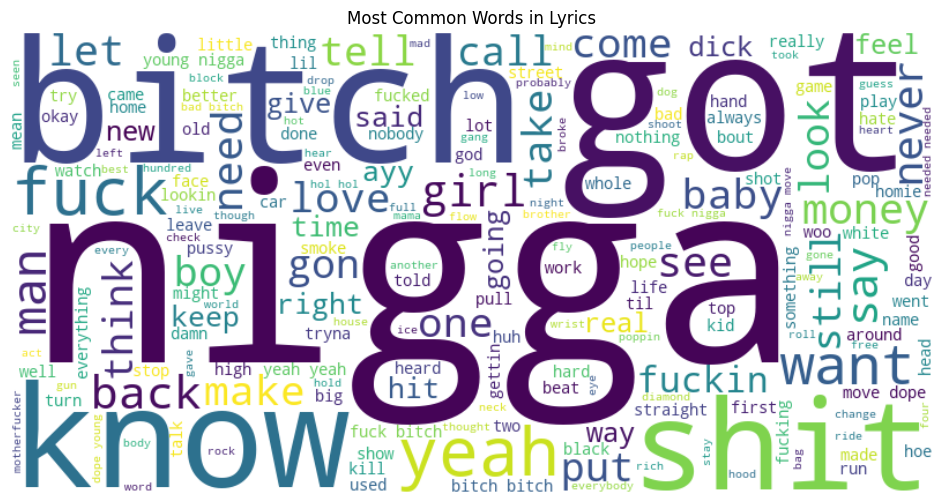

In [ ]:
from wordcloud import WordCloud

cluster_curr = 2
df_cluster_n = train_cluster_result[train_cluster_result['cluster'] == cluster_curr]

all_words_clean = [word for tokens in df_cluster_n['tokens'] for word in tokens]
all_words_clean_str = " ".join(all_words_clean)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words_clean_str)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [ ]:
from collections import Counter

word_counts_clean = Counter(all_words_clean)
word_counts_clean.most_common(20)

[('like', 2257),
 ('nigga', 2209),
 ('got', 1624),
 ('bitch', 1566),
 ('yeah', 1123),
 ('fuck', 1038),
 ('know', 1033),
 ('get', 974),
 ('shit', 919),
 ('want', 782),
 ('back', 540),
 ('man', 478),
 ('money', 447),
 ('make', 444),
 ('one', 437),
 ('girl', 406),
 ('let', 394),
 ('time', 392),
 ('say', 376),
 ('see', 367)]